In [3]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from pysal.model import spreg
from pysal.lib import weights
from pykrige.ok import OrdinaryKriging
import libpysal
import esda
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import matplotlib.colors as mcolors

In [4]:
pay = pd.read_csv('weekly pay.csv', na_values=[':'], low_memory=False)
smoke = pd.read_csv('smoke.csv', na_values=[':'], low_memory=False)
learn = pd.read_csv('3level or aborve.csv', na_values=[':'], low_memory=False)
employment = pd.read_csv('employment rate.csv', na_values=[':'], low_memory=False)
obesity = pd.read_csv('obesity.csv', na_values=[':'], low_memory=False)
# rent = pd.read_excel('weekly rent.xlsx')
England = gpd.read_file('Counties_and_Unitary_Authorities_December_2021_EN_BUC_-4341837472059334351/CTYUA_DEC_2021_EN_BUC.shp')
# wellbeing = pd.read_excel('headlineestimatespersonalwellbeing2020to2021.xlsx',sheet_name='Life Satisfaction - Means')
wellbeing = pd.read_excel('annualpersonalwellbeingestimatesapril2021tomarch2022 (1).xlsx',sheet_name='1 Life satisfaction means')


wellbeing

Area Names  Area Codes April 2011 to March 2012  \
0             UNITED KINGDOM  K02000001                     7.42   
1                    ENGLAND  E92000001                     7.41   
2                 NORTH EAST  E12000001                     7.44   
3              County Durham  E06000047                     7.52   
4                 Darlington  E06000005                      7.5   
..                       ...        ...                      ...   
413      Fermanagh and Omagh  N09000006                      [x]   
414  Lisburn and Castlereagh  N09000007                      [x]   
415      Mid and East Antrim  N09000008                      [x]   
416               Mid Ulster  N09000009                      [x]   
417   Newry, Mourne and Down  N09000010                      [x]   

    April 2011 to March 2012\n\nData accuracy April 2012 to March 2013  \
0                                       [cv1]                     7.46   
1                                       [cv1]                     7.44   
2                                       [cv1]                     7.39   
3                                       [cv1]                      7.3   
4                                       [cv1]                     7.46   
..                                        ...                      ...   
413                                       [x]                     8.06   
414                                       [x]                     8.06   
415                                       [x]                     7.94   
416                                       [x]                     7.98   
417                                       [x]                     7.82   

    April 2012 to March 2013\n\nData accuracy April 2013 to March 2014  \
0                                       [cv1]                     7.51   
1                                       [cv1]                      7.5   
2                                       [cv1]                     7.47   
3                                       [cv1]                     7.49   
4                                       [cv1]                     7.59   
..                                        ...                      ...   
413                                     [cv1]                     8.33   
414                                     [cv1]                      7.7   
415                                     [cv1]                     7.87   
416                                     [cv1]                     7.77   
417                                     [cv1]                     7.84   

    April 2013 to March 2014\n\nData accuracy April 2014 to March 2015  \
0                                       [cv1]                     7.61   
1                                       [cv1]                      7.6   
2                                       [cv1]                     7.57   
3                                       [cv1]                     7.69   
4                                       [cv1]                     7.68   
..                                        ...                      ...   
413                                     [cv1]                     8.38   
414                                     [cv1]                     7.69   
415                                     [cv1]                     8.17   
416                                     [cv1]                     8.16   
417                                     [cv1]                     7.88   

    April 2014 to March 2015\n\nData accuracy  ... April 2017 to March 2018  \
0                                       [cv1]  ...                     7.69   
1                                       [cv1]  ...                     7.68   
2                                       [cv1]  ...                     7.66   
3                                       [cv1]  ...                      7.8   
4                                       [cv1]  ...                     7.74   
..                                        ...  ...         

In [5]:
wellbeing = wellbeing.rename(columns={'Area Codes': 'Area code','Area Names ': 'Area_Names'})
wellbeing

Area_Names  Area code April 2011 to March 2012  \
0             UNITED KINGDOM  K02000001                     7.42   
1                    ENGLAND  E92000001                     7.41   
2                 NORTH EAST  E12000001                     7.44   
3              County Durham  E06000047                     7.52   
4                 Darlington  E06000005                      7.5   
..                       ...        ...                      ...   
413      Fermanagh and Omagh  N09000006                      [x]   
414  Lisburn and Castlereagh  N09000007                      [x]   
415      Mid and East Antrim  N09000008                      [x]   
416               Mid Ulster  N09000009                      [x]   
417   Newry, Mourne and Down  N09000010                      [x]   

    April 2011 to March 2012\n\nData accuracy April 2012 to March 2013  \
0                                       [cv1]                     7.46   
1                                       [cv1]                     7.44   
2                                       [cv1]                     7.39   
3                                       [cv1]                      7.3   
4                                       [cv1]                     7.46   
..                                        ...                      ...   
413                                       [x]                     8.06   
414                                       [x]                     8.06   
415                                       [x]                     7.94   
416                                       [x]                     7.98   
417                                       [x]                     7.82   

    April 2012 to March 2013\n\nData accuracy April 2013 to March 2014  \
0                                       [cv1]                     7.51   
1                                       [cv1]                      7.5   
2                                       [cv1]                     7.47   
3                                       [cv1]                     7.49   
4                                       [cv1]                     7.59   
..                                        ...                      ...   
413                                     [cv1]                     8.33   
414                                     [cv1]                      7.7   
415                                     [cv1]                     7.87   
416                                     [cv1]                     7.77   
417                                     [cv1]                     7.84   

    April 2013 to March 2014\n\nData accuracy April 2014 to March 2015  \
0                                       [cv1]                     7.61   
1                                       [cv1]                      7.6   
2                                       [cv1]                     7.57   
3                                       [cv1]                     7.69   
4                                       [cv1]                     7.68   
..                                        ...                      ...   
413                                     [cv1]                     8.38   
414                                     [cv1]                     7.69   
415                                     [cv1]                     8.17   
416                                     [cv1]                     8.16   
417                                     [cv1]                     7.88   

    April 2014 to March 2015\n\nData accuracy  ... April 2017 to March 2018  \
0                                       [cv1]  ...                     7.69   
1                                       [cv1]  ...                     7.68   
2                                       [cv1]  ...                     7.66   
3                                       [cv1]  ...                      7.8   
4                                       [cv1]  ...                     7.74   
..                                        ...  ...          

In [6]:
England=England.rename(columns={'CTYUA21CD': 'Area code'})
merged = pd.merge(wellbeing, England, on='Area code', how='inner')
England = England[England['Area code'].isin(merged['Area code'])]
wellbeing = wellbeing[wellbeing['Area code'].isin(merged['Area code'])]

In [7]:
England

Area code             CTYUA21NM   BNG_E   BNG_N     LONG      LAT  \
0    E06000001            Hartlepool  447160  531474 -1.27018  54.6761   
1    E06000002         Middlesbrough  451141  516887 -1.21099  54.5447   
2    E06000003  Redcar and Cleveland  464361  519597 -1.00608  54.5675   
3    E06000004      Stockton-on-Tees  444940  518183 -1.30664  54.5569   
4    E06000005            Darlington  428029  515648 -1.56835  54.5353   
..         ...                   ...     ...     ...      ...      ...   
147  E10000029               Suffolk  608219  266120  1.04919  52.2538   
148  E10000030                Surrey  515966  153408 -0.33911  51.2680   
149  E10000031          Warwickshire  429584  253588 -1.56874  52.1798   
150  E10000032           West Sussex  508316  118010 -0.45933  50.9513   
151  E10000034        Worcestershire  385792  257203 -2.20935  52.2129   

                                 GlobalID  \
0    e2ade4b3-57ad-40b3-9abd-510a3fad62fe   
1    fb585070-81ef-43e3-b191-6d185ba60a96   
2    4c8f257a-4b5a-4d03-b29d-5fdbdbabb816   
3    82dbad8f-46bf-4204-bd1f-45eab08a67b7   
4    cef6bbfd-ba19-4150-8a7d-4e24b8a5430a   
..                                    ...   
147  d7c07649-4c62-459d-9fa5-4647c4a320b3   
148  cc16bc04-f583-4829-a02a-565cdaac4d77   
149  80e6c673-2899-4215-81bf-39911cd44ee2   
150  d89e50cf-7879-4319-a4db-6e8c62ef3719   
151  3fb70392-24e2-4c36-ae65-dfcfbc7c391b   

                                              geometry  
0    POLYGON ((448906.042 536703.720, 448926.003 53...  
1    POLYGON ((451894.353 521145.363, 453997.697 51...  
2    POLYGON ((478227.056 518780.442, 477689.303 51...  
3    POLYGON ((452185.284 526288.464, 451741.384 52...  
4    POLYGON ((436388.002 522354.197, 437351.702 52...  
..                                                 ...  
147  POLYGON ((651106.502 300527.104, 652813.502 29...  
148  MULTIPOLYGON (((486959.850 134505.300, 486289....  
149  POLYGON ((429849.397 299906.502, 432135.200 29...  
150  MULTIPOLYGON (((477033.697 102497.600, 476828....  
151  POLYGON ((381775.900 282326.504, 388692.204 28...  

[151 rows x 8 columns]

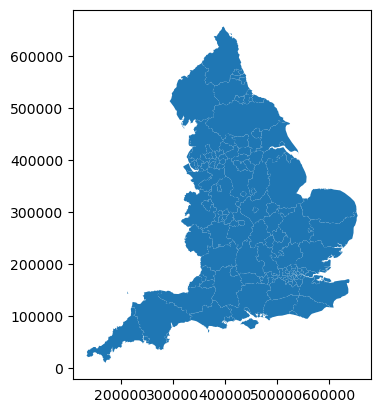

In [8]:
England.plot()
plt.savefig('England.png')


In [9]:
employment = employment[employment['Area code'].isin(wellbeing['Area code'])]
smoke = smoke[smoke['Area code'].isin(wellbeing['Area code'])]
learn = learn[learn['Area code'].isin(wellbeing['Area code'])]
pay = pay[pay['Area code'].isin(wellbeing['Area code'])]
obesity = obesity[obesity['Area code'].isin(wellbeing['Area code'])]

In [10]:
wellbeing

Area_Names  Area code April 2011 to March 2012  \
3            County Durham  E06000047                     7.52   
4               Darlington  E06000005                      7.5   
5               Hartlepool  E06000001                     7.48   
6            Middlesbrough  E06000002                     7.41   
7           Northumberland  E06000057                     7.49   
..                     ...        ...                      ...   
341              Somerset   E10000027                      7.5   
346  South Gloucestershire  E06000025                     7.31   
347                Swindon  E06000030                     7.49   
348                 Torbay  E06000027                     7.23   
349              Wiltshire  E06000054                     7.59   

    April 2011 to March 2012\n\nData accuracy April 2012 to March 2013  \
3                                       [cv1]                      7.3   
4                                       [cv1]                     7.46   
5                                       [cv1]                     7.32   
6                                       [cv1]                     7.39   
7                                       [cv1]                     7.54   
..                                        ...                      ...   
341                                     [cv1]                     7.51   
346                                     [cv1]                     7.53   
347                                     [cv1]                     7.48   
348                                     [cv1]                     7.35   
349                                     [cv1]                     7.65   

    April 2012 to March 2013\n\nData accuracy April 2013 to March 2014  \
3                                       [cv1]                     7.49   
4                                       [cv1]                     7.59   
5                                       [cv1]                     7.48   
6                                       [cv1]                     7.41   
7                                       [cv1]                     7.59   
..                                        ...                      ...   
341                                     [cv1]                     7.62   
346                                     [cv1]                     7.61   
347                                     [cv1]                     7.41   
348                                     [cv1]                     7.33   
349                                     [cv1]                     7.66   

    April 2013 to March 2014\n\nData accuracy April 2014 to March 2015  \
3                                       [cv1]                     7.69   
4                                       [cv1]                     7.68   
5                                       [cv1]                     7.66   
6                                       [cv1]                     7.53   
7                                       [cv1]                     7.63   
..                                        ...                      ...   
341                                     [cv1]                     7.75   
346                                     [cv1]                     7.65   
347                                     [cv1]                     7.48   
348                                     [cv1]                     7.45   
349                                     [cv1]                     7.72   

    April 2014 to March 2015\n\nData accuracy  ... April 2017 to March 2018  \
3                                       [cv1]  ...                      7.8   
4                                       [cv1]  ...                     7.74   
5                                       [cv1]  ...                     7.49   
6                                       [cv1]  ...                     7.62   
7                                       [cv1]  ...                     7.63   
..                                        ...  ...                      ...   
341

In [11]:
pay

Area code             Area name   2008   2009   2010   2011   2012  \
0    E06000001            Hartlepool  370.5  363.1  383.7  368.5  391.4   
1    E06000002         Middlesbrough  308.1  313.4  325.8  304.7  340.4   
2    E06000003  Redcar and Cleveland  337.2  325.9  332.2  347.4  333.8   
3    E06000004      Stockton-on-Tees  344.4  385.4  375.4  387.4  405.3   
4    E06000005            Darlington  348.6  370.2  378.7  354.7  347.7   
..         ...                   ...    ...    ...    ...    ...    ...   
154  E10000029               Suffolk  361.2  370.5  373.5  369.1  372.9   
155  E10000030                Surrey  509.6  516.9  519.1  527.5  536.6   
156  E10000031          Warwickshire  409.8  415.2  421.4  416.6  431.2   
157  E10000032           West Sussex  387.6  392.9  395.5  397.9  412.6   
158  E10000034        Worcestershire  353.6  370.0  383.1  373.9  373.8   

      2013   2014   2015   2016   2017   2018   2019   2020   2021   2022  \
0    403.1  385.6  408.8  428.2  431.6  434.6  442.4  451.4  489.3  496.9   
1    318.5  332.7  365.7  355.6  364.3  378.5  397.6  414.6  422.0  452.5   
2    369.2  362.1  381.0  385.0  387.6  393.7  397.2  417.2  436.6  440.8   
3    421.4  407.2  399.6  416.2  435.7  423.6  453.5  467.6  471.4  511.6   
4    381.7  386.9  402.0  437.2  416.2  415.1  440.4  427.9  502.4  480.4   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
154  389.1  381.6  391.9  415.0  424.4  438.2  454.2  445.5  473.1  498.3   
155  520.5  533.2  536.6  545.0  555.8  566.7  593.0  571.8  606.7  641.4   
156  442.7  443.8  441.1  469.7  475.2  495.7  498.3  504.6  537.4  579.8   
157  406.5  421.1  437.4  437.3  449.1  460.0  475.4  476.9  500.0  536.6   
158  387.4  383.3  406.2  408.4  430.4  438.6  453.0  437.6  490.2  518.2   

      2023  
0    521.2  
1    481.9  
2    478.1  
3    525.5  
4    530.5  
..     ...  
154  552.8  
155  682.3  
156  593.6  
157  570.6  
158  572.1  

[151 rows x 18 columns]

In [12]:
smoke

Area code             Area name  2012  2013  2014  2015  2016  2017  \
0    E06000001            Hartlepool  28.1  24.0  23.6  22.8  19.6  19.2   
1    E06000002         Middlesbrough  24.9  23.1  21.2  20.8  17.1  18.6   
2    E06000003  Redcar and Cleveland  21.5  21.8  18.7  17.3  16.3  15.0   
3    E06000004      Stockton-on-Tees  20.3  19.4  19.6  18.4  12.4  15.0   
4    E06000005            Darlington  19.4  19.2  19.2  17.9  17.3  14.4   
..         ...                   ...   ...   ...   ...   ...   ...   ...   
149  E10000029               Suffolk  18.3  18.6  19.5  16.1  14.7  13.9   
150  E10000030                Surrey  14.0  15.1  14.8  14.0  12.4  10.9   
151  E10000031          Warwickshire  18.5  15.6  15.4  12.1  14.5  12.6   
152  E10000032           West Sussex  18.4  16.9  16.8  14.6  15.4  12.8   
153  E10000034        Worcestershire  17.2  14.9  16.8  15.8  13.5  14.7   

     2018  2019  2020  2021  2022  
0    18.6  19.3  17.7  17.3  14.3  
1    17.4  17.2  15.7  17.9  16.5  
2    13.5  15.5  17.1  13.3  13.7  
3    16.4  13.2  13.0  12.5  13.2  
4    13.8  13.7  13.8  10.6  11.5  
..    ...   ...   ...   ...   ...  
149  13.0  16.1  14.2  13.2  14.0  
150  10.2  10.0  10.4   7.8  11.9  
151  14.1  13.3  13.5  13.9  13.9  
152  12.5  10.0  13.3  12.4  12.5  
153  11.8  10.8  11.5  14.0  11.5  

[151 rows x 13 columns]

In [13]:
learn

Area code             Area name  2004  2005  2006  2007  2008  2009  \
0    E06000001            Hartlepool  34.4  36.3  40.0  38.6  38.4  38.7   
1    E06000002         Middlesbrough  36.9  35.5  41.4  41.2  41.2  39.7   
2    E06000003  Redcar and Cleveland  37.5  39.2  41.2  42.6  42.0  42.7   
3    E06000004      Stockton-on-Tees  41.1  45.9  46.9  46.2  44.7  44.4   
4    E06000005            Darlington  41.4  42.1  45.8  47.7  48.4  47.2   
..         ...                   ...   ...   ...   ...   ...   ...   ...   
147  E10000029               Suffolk  39.0  40.3  38.2  41.0  39.2  42.3   
148  E10000030                Surrey  53.3  55.1  55.5  56.0  57.5  56.7   
149  E10000031          Warwickshire  46.6  46.9  47.9  50.7  49.5  47.9   
150  E10000032           West Sussex  47.1  47.1  49.2  50.0  47.5  48.1   
151  E10000034        Worcestershire  42.4  44.2  48.3  47.4  45.0  46.3   

     2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
0    41.7  41.3  42.0  44.9  44.1  47.3  47.1  46.0  46.1  49.8  56.0  56.4  
1    41.4  38.8  40.9  47.5  46.3  49.3  51.3  42.9  45.9  44.3  49.0  48.7  
2    44.1  43.5  46.9  49.3  50.3  53.1  53.2  50.7  51.8  48.8  48.3  53.3  
3    47.7  47.7  50.6  54.2  55.7  56.9  54.6  53.3  53.2  53.6  64.1  58.8  
4    49.4  47.0  48.3  53.0  53.6  52.7  53.9  54.9  55.9  53.2  58.2  60.7  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
147  46.0  47.4  48.9  48.0  48.4  48.3  50.0  54.2  50.9  51.7  55.3  54.5  
148  56.9  60.2  63.4  63.3  61.9  64.8  64.7  66.6  66.5  67.7  67.7  69.0  
149  48.7  47.7  52.5  56.4  54.6  59.0  56.7  57.6  60.1  60.9  65.8  62.7  
150  47.0  55.5  53.9  54.9  54.3  56.6  57.9  57.2  61.1  60.3  60.2  60.6  
151  46.4  47.7  51.6  55.7  55.1  55.2  58.1  56.4  56.0  58.7  59.0  61.7  

[151 rows x 20 columns]

In [14]:
employment

Area code             Area name  2004  2005  2006  2007  2008  2009  \
0    E06000001            Hartlepool  63.0  64.7  64.6  63.9  65.2  60.4   
1    E06000002         Middlesbrough  63.6  65.2  65.6  65.4  62.5  62.2   
2    E06000003  Redcar and Cleveland  69.1  66.6  68.7  67.8  64.4  62.8   
3    E06000004      Stockton-on-Tees  70.6  72.3  70.9  70.2  68.2  68.9   
4    E06000005            Darlington  74.2  72.8  73.5  71.9  72.1  68.5   
..         ...                   ...   ...   ...   ...   ...   ...   ...   
147  E10000029               Suffolk  77.0  77.1  75.3  76.8  77.8  75.7   
148  E10000030                Surrey  78.3  78.3  78.3  78.3  78.4  76.0   
149  E10000031          Warwickshire  75.3  76.6  76.8  77.1  77.2  73.8   
150  E10000032           West Sussex  77.5  77.8  76.4  77.8  78.3  75.2   
151  E10000034        Worcestershire  75.7  76.9  78.3  75.8  76.4  75.5   

     2010  2011  ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  \
0    61.6  58.4  ...  62.6  64.2  64.4  62.3  63.9  67.6  66.9  68.6  68.2   
1    59.0  55.5  ...  61.5  63.5  65.6  64.1  63.2  62.9  65.0  65.3  65.9   
2    62.1  60.7  ...  67.5  67.7  68.2  68.5  69.0  67.4  68.3  65.9  69.8   
3    70.1  70.3  ...  70.4  73.5  70.8  71.9  70.0  71.3  74.4  71.6  73.7   
4    70.8  67.8  ...  71.9  72.5  74.8  74.4  75.6  74.2  74.0  76.5  76.6   
..    ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
147  73.9  76.1  ...  75.5  76.6  77.1  77.4  78.5  78.3  76.6  78.0  80.0   
148  76.9  76.4  ...  75.8  76.4  80.5  78.8  78.8  81.8  80.8  79.8  78.8   
149  72.6  72.6  ...  76.8  78.7  76.1  79.5  80.9  80.7  79.7  80.2  81.3   
150  76.9  76.2  ...  78.5  78.7  79.1  80.5  79.5  82.0  78.9  78.6  79.4   
151  74.3  72.4  ...  78.3  76.1  76.2  76.9  79.4  78.0  77.9  78.8  77.3   

     2023  
0    67.9  
1    64.4  
2    74.3  
3    74.1  
4    81.2  
..    ...  
147  77.2  
148  82.5  
149  80.4  
150  77.5  
151  81.0  

[151 rows x 22 columns]

In [15]:
obesity

Area code             Area name      2015      2016      2017      2018  \
0    E06000001            Hartlepool  30.01597  31.81439  32.60958  35.55578   
1    E06000002         Middlesbrough  30.31990  24.52194  30.33828  33.31244   
2    E06000003  Redcar and Cleveland  27.54672  27.87324  33.56007  32.24400   
3    E06000004      Stockton-on-Tees  27.95903  28.01173  29.83654  31.94394   
4    E06000005            Darlington  27.43409  22.09684  30.40732  21.52794   
..         ...                   ...       ...       ...       ...       ...   
151  E10000029               Suffolk  24.54944  24.86658  23.55780  26.24017   
152  E10000030                Surrey  17.77553  18.61103  17.55493  17.33402   
153  E10000031          Warwickshire  21.03560  21.21260  23.13933  24.49749   
154  E10000032           West Sussex  20.14760  19.26804  20.30161  21.98057   
155  E10000034        Worcestershire  23.05295  22.67105  22.84804  22.39383   

         2019      2020      2021      2022  
0    37.35965  34.63238  35.35587  33.80489  
1    35.04028  31.95300  35.29352  34.67974  
2    27.61388  33.37358  34.80189  31.17215  
3    30.54491  40.21633  32.84926  34.08819  
4    33.34578  35.68230  29.99722  30.51878  
..        ...       ...       ...       ...  
151  25.20420  23.83513  27.57576  26.75628  
152  19.76628  19.18607  20.28257  20.38061  
153  23.54089  25.76313  25.99205  26.39319  
154  22.90539  23.19427  23.10040  23.94503  
155  23.89645  25.70086  26.69364  27.67285  

[151 rows x 10 columns]

In [16]:
wellbeing
for col in wellbeing.columns[2:]:
    wellbeing[col] = pd.to_numeric(wellbeing[col], errors='coerce')

In [17]:
wellbeing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 3 to 349
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Area_Names                               151 non-null    object 
 1   Area code                                151 non-null    object 
 2   April 2011 to March 2012                 148 non-null    float64
 3   April 2011 to March 2012

Data accuracy  0 non-null      float64
 4   April 2012 to March 2013                 148 non-null    float64
 5   April 2012 to March 2013

Data accuracy  0 non-null      float64
 6   April 2013 to March 2014                 148 non-null    float64
 7   April 2013 to March 2014

Data accuracy  0 non-null      float64
 8   April 2014 to March 2015                 148 non-null    float64
 9   April 2014 to March 2015

Data accuracy  0 non-null      float64
 10  April 2015 to March 2016                 148 non-null  

In [18]:

mask = wellbeing.isna().any(axis=1)
rows_with_nan = wellbeing[mask]

print("含有空值的行：")
print(rows_with_nan)


含有空值的行：
                Area_Names  Area code  April 2011 to March 2012  \
3            County Durham  E06000047                      7.52   
4               Darlington  E06000005                      7.50   
5               Hartlepool  E06000001                      7.48   
6            Middlesbrough  E06000002                      7.41   
7           Northumberland  E06000057                      7.49   
..                     ...        ...                       ...   
341              Somerset   E10000027                      7.50   
346  South Gloucestershire  E06000025                      7.31   
347                Swindon  E06000030                      7.49   
348                 Torbay  E06000027                      7.23   
349              Wiltshire  E06000054                      7.59   

     April 2011 to March 2012\n\nData accuracy  April 2012 to March 2013  \
3                                          NaN                      7.30   
4                                  

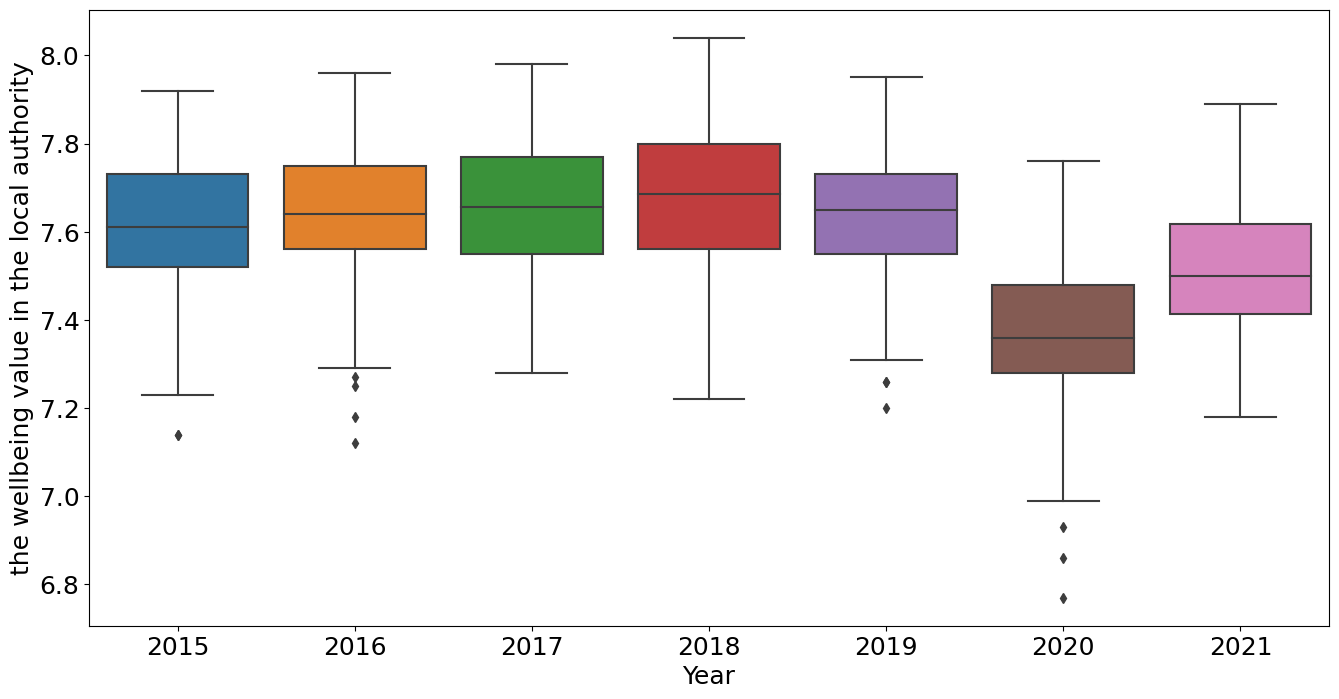

In [19]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=wellbeing[['April 2015 to March 2016', 'April 2016 to March 2017', 'April 2017 to March 2018', 'April 2018 to March 2019','April 2019 to March 2020','April 2020 to March 2021','April 2021 to March 2022']])
# sns.boxplot(data=wellbeing[['April 2015 to March 2016']])
plt.ylabel('Values')
plt.xticks(ticks=range(7), labels=['2015', '2016', '2017', '2018', '2019', '2020', '2021'], fontsize=18)

plt.ylabel('the wellbeing value in the local authority',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('Box Plot of wellbeing Data.png',bbox_inches='tight')
# plt.show()


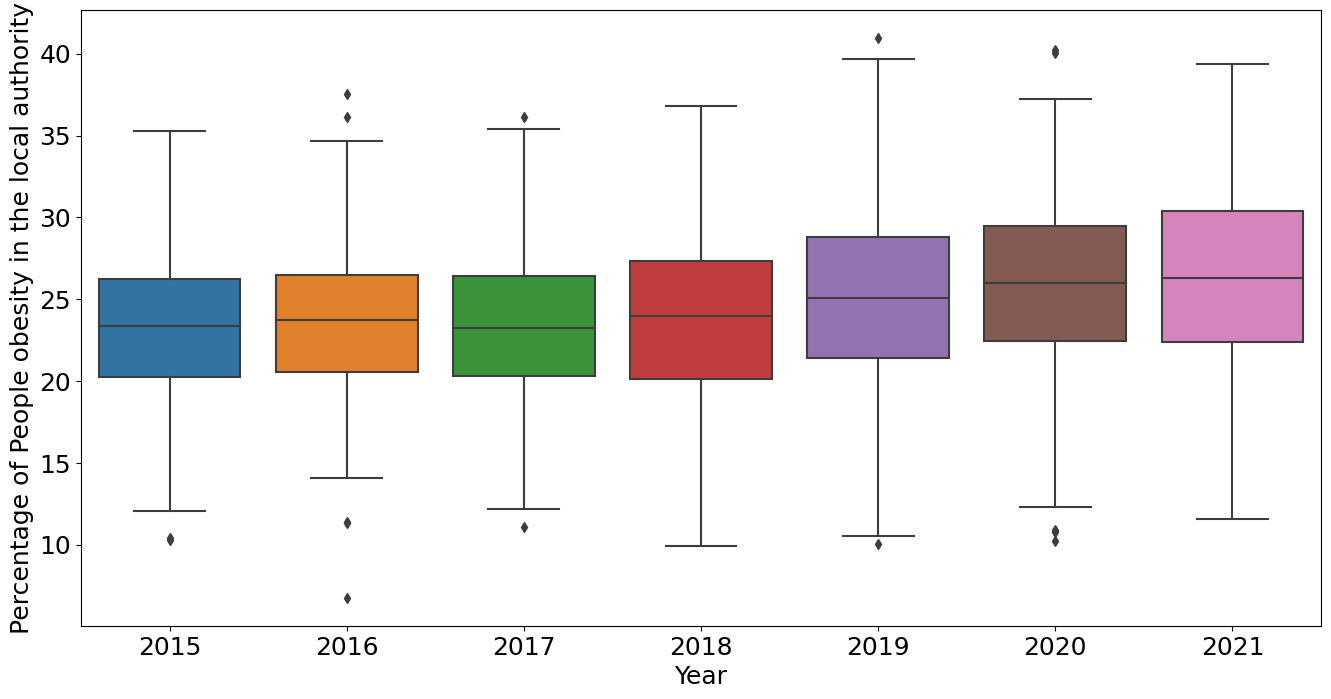

In [20]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=obesity[['2015', '2016', '2017', '2018','2019','2020','2021']])
plt.ylabel('Percentage of People obesity in the local authority',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('Box Plot of obesity Data.png' ,bbox_inches='tight')
# plt.show()


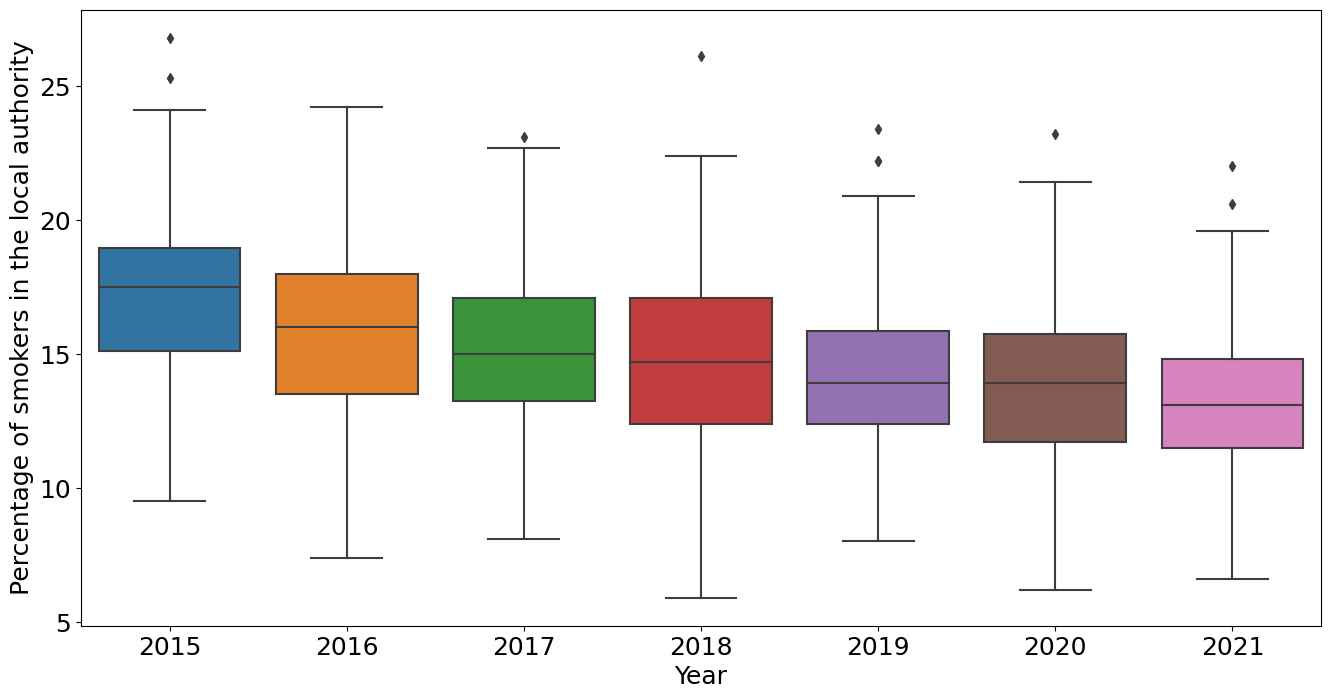

In [21]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=smoke[['2015', '2016', '2017', '2018','2019','2020','2021']])
plt.ylabel('Percentage of smokers in the local authority',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.show()
plt.savefig('Box Plot of smoke Data',bbox_inches='tight')


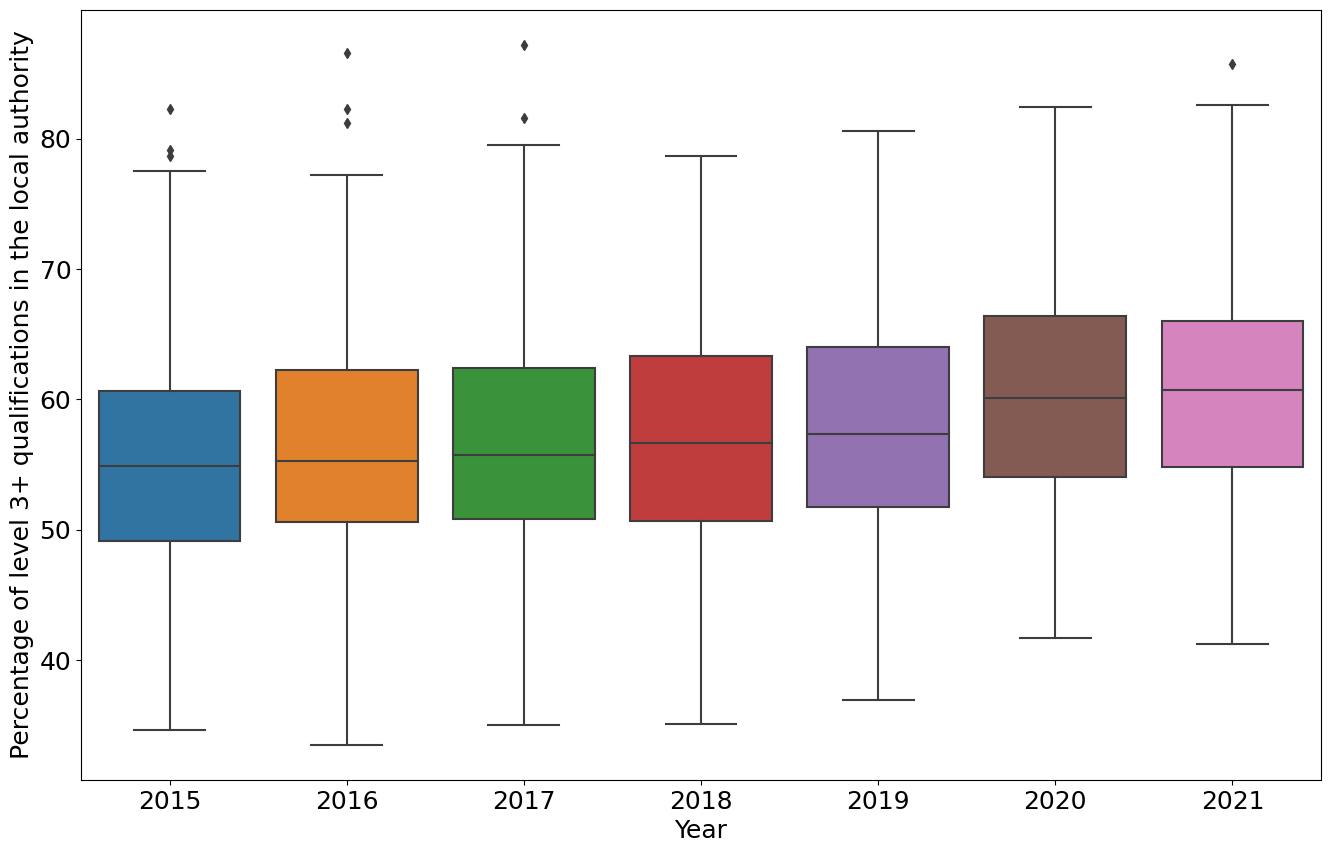

In [22]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=learn[['2015', '2016', '2017', '2018','2019','2020','2021']])

plt.ylabel('Percentage of level 3+ qualifications in the local authority',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.show()
plt.savefig('Box Plot of learn Data',bbox_inches='tight')

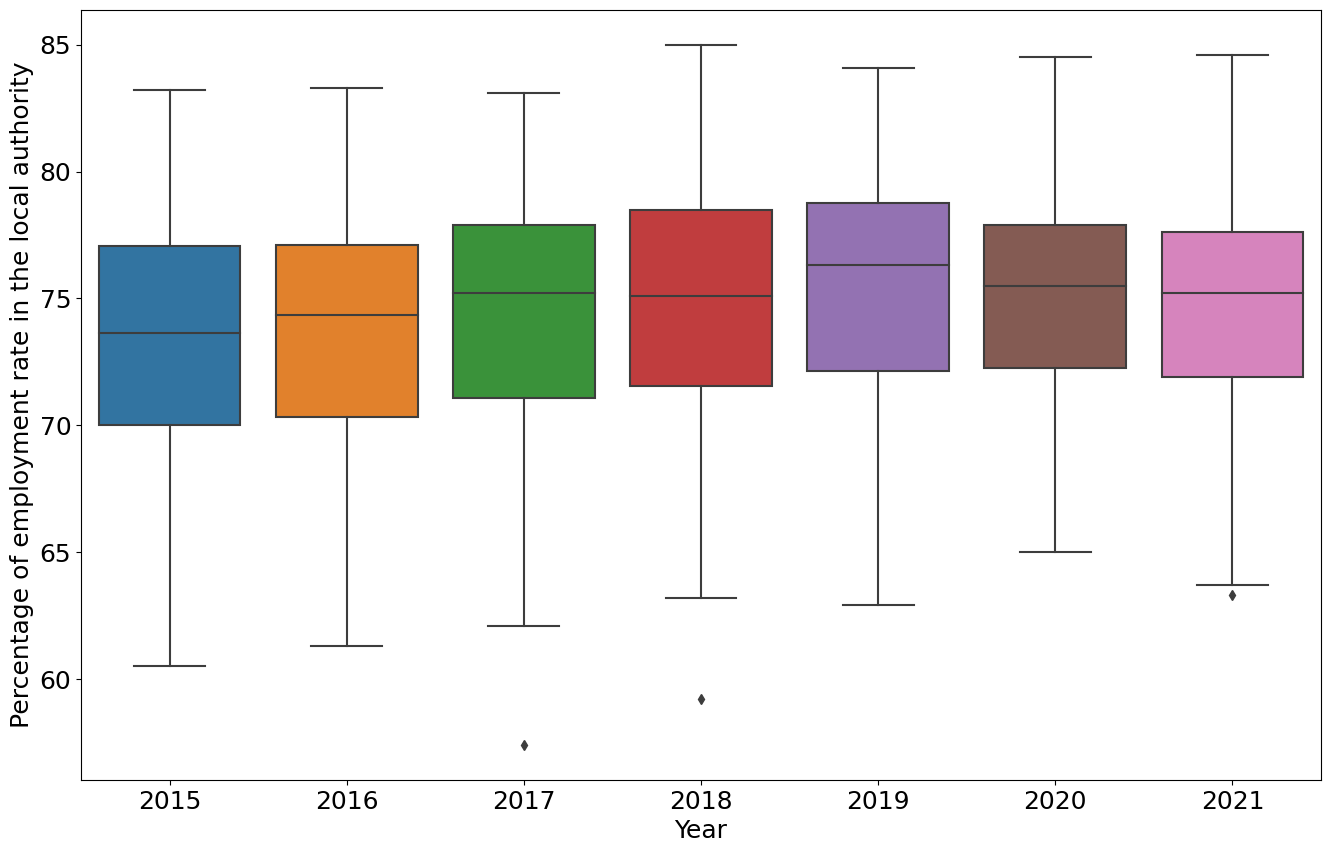

In [23]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=employment[['2015', '2016', '2017', '2018','2019','2020','2021']])

plt.ylabel('Percentage of employment rate in the local authority',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.show()
plt.savefig('ox Plot of employment Data',bbox_inches='tight')


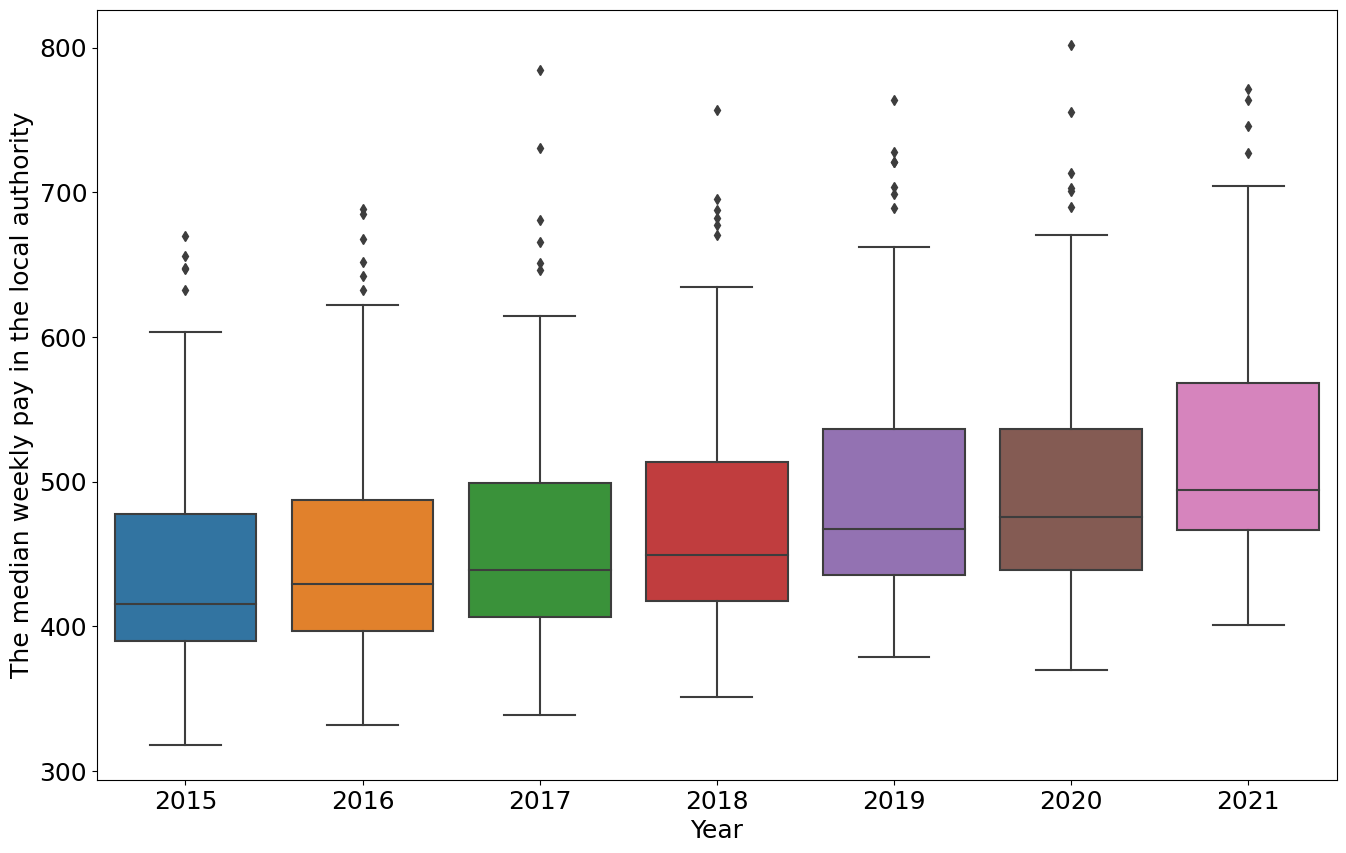

In [24]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=pay[['2015', '2016', '2017', '2018','2019','2020','2021']])

plt.ylabel('The median weekly pay in the local authority',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.show()
plt.savefig('Box Plot of pay Data',bbox_inches='tight')


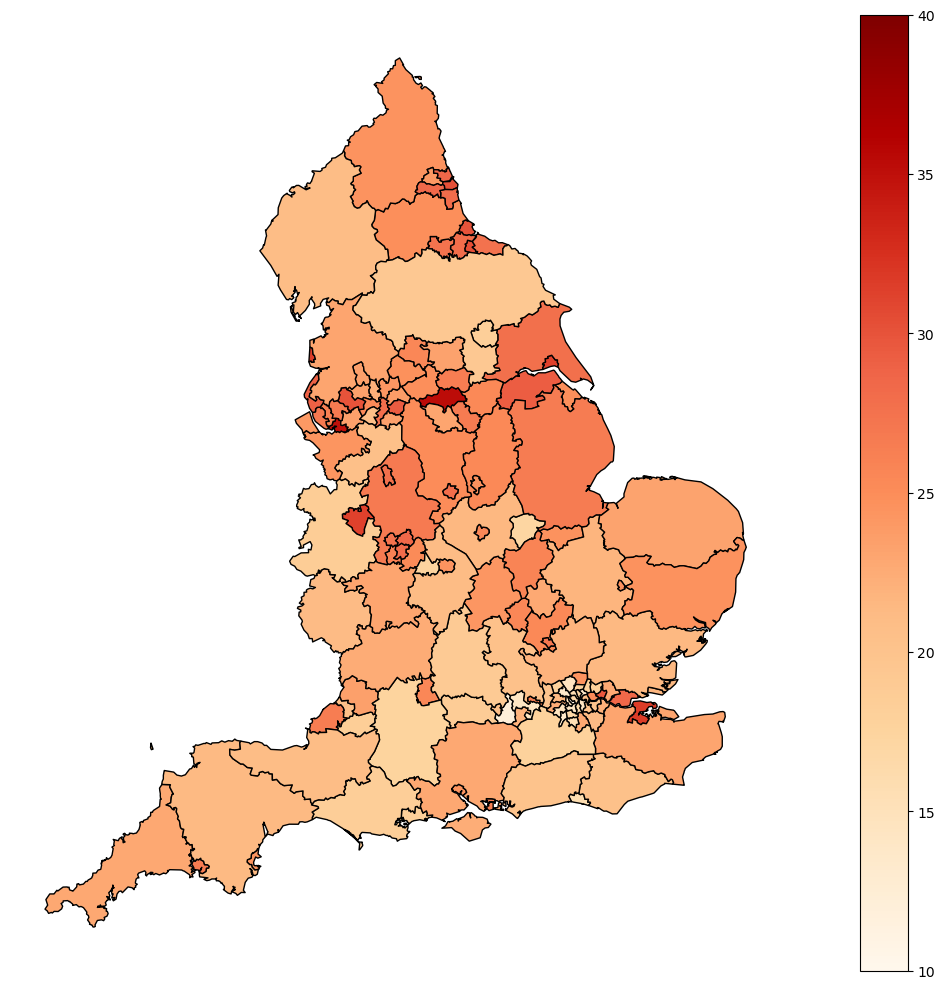

In [25]:
# 合并数据集
gdf_obesity = England.merge(obesity, on='Area code')

# 设定颜色映射的最小值和最大值
vmin = 10
vmax = 40
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 绘制2015年的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_obesity.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('obesity2015.png',bbox_inches='tight')

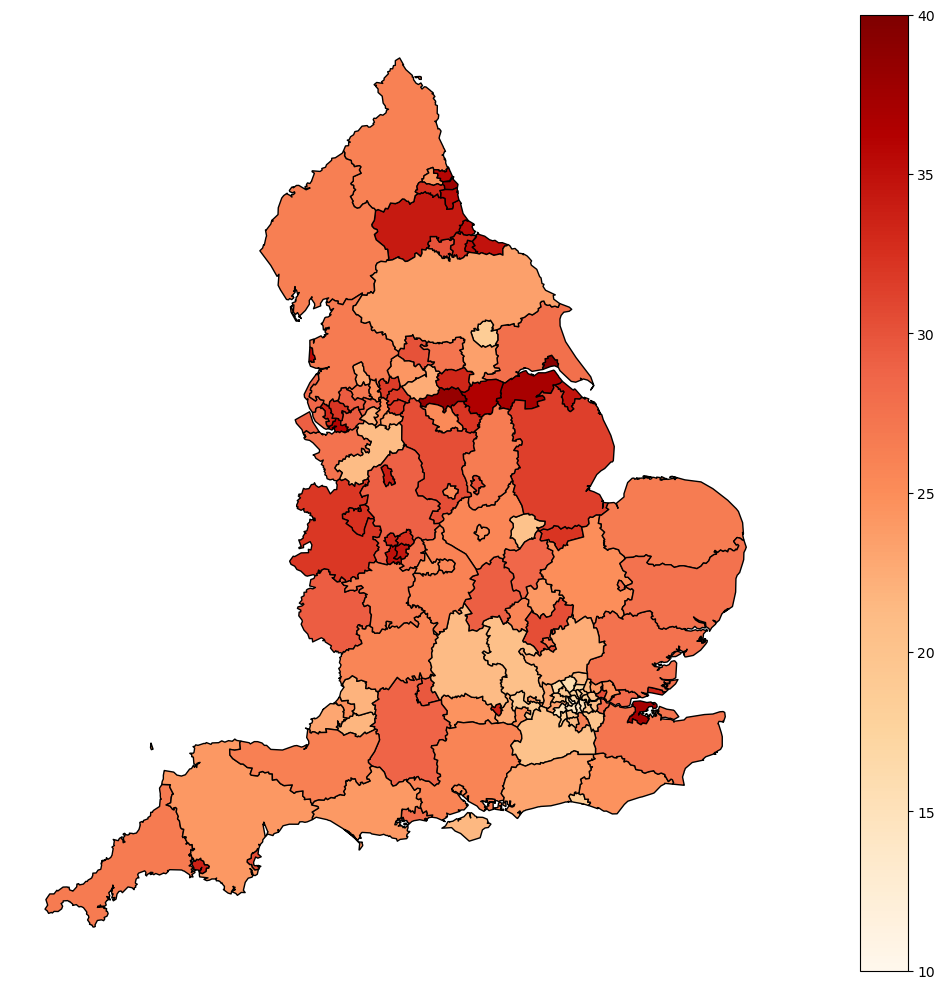

In [26]:

# 设定颜色映射的最小值和最大值
vmin = 10
vmax = 40
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 绘制2015年的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_obesity.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('obesity2021.png',bbox_inches='tight')

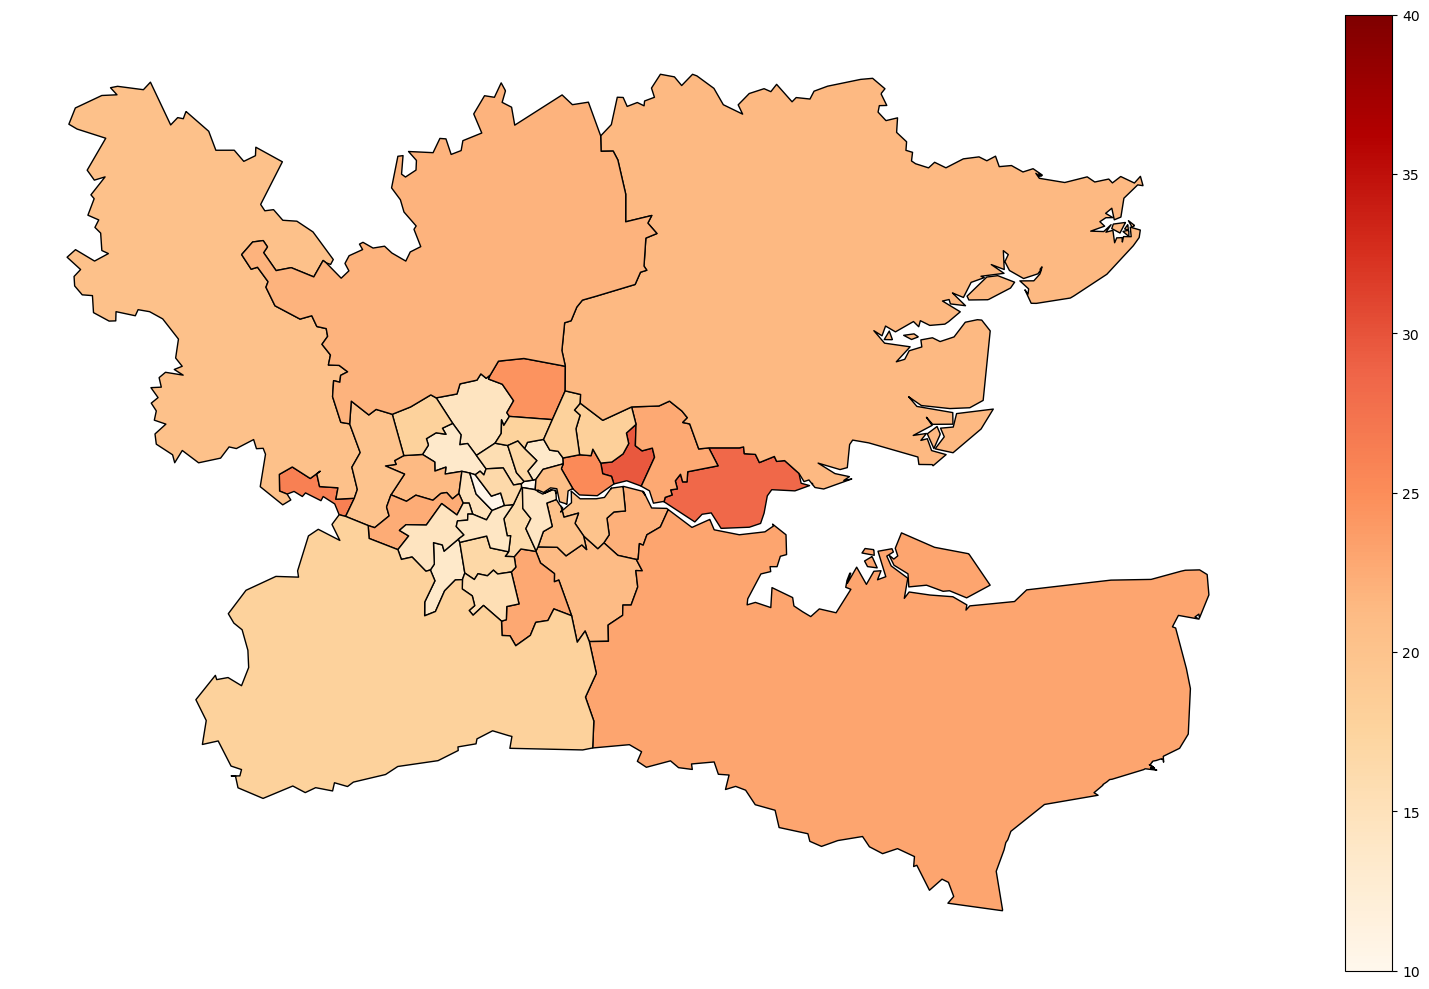

In [27]:
# 合并数据集

# 确保数据使用 WGS 84 坐标系（EPSG:4326）
gdf_obesity = gdf_obesity.to_crs(epsg=4326)

# 设定颜色映射的最小值和最大值
vmin = 10
vmax = 40
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_obesity.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('obesity2015_伦敦区域.png',bbox_inches='tight')

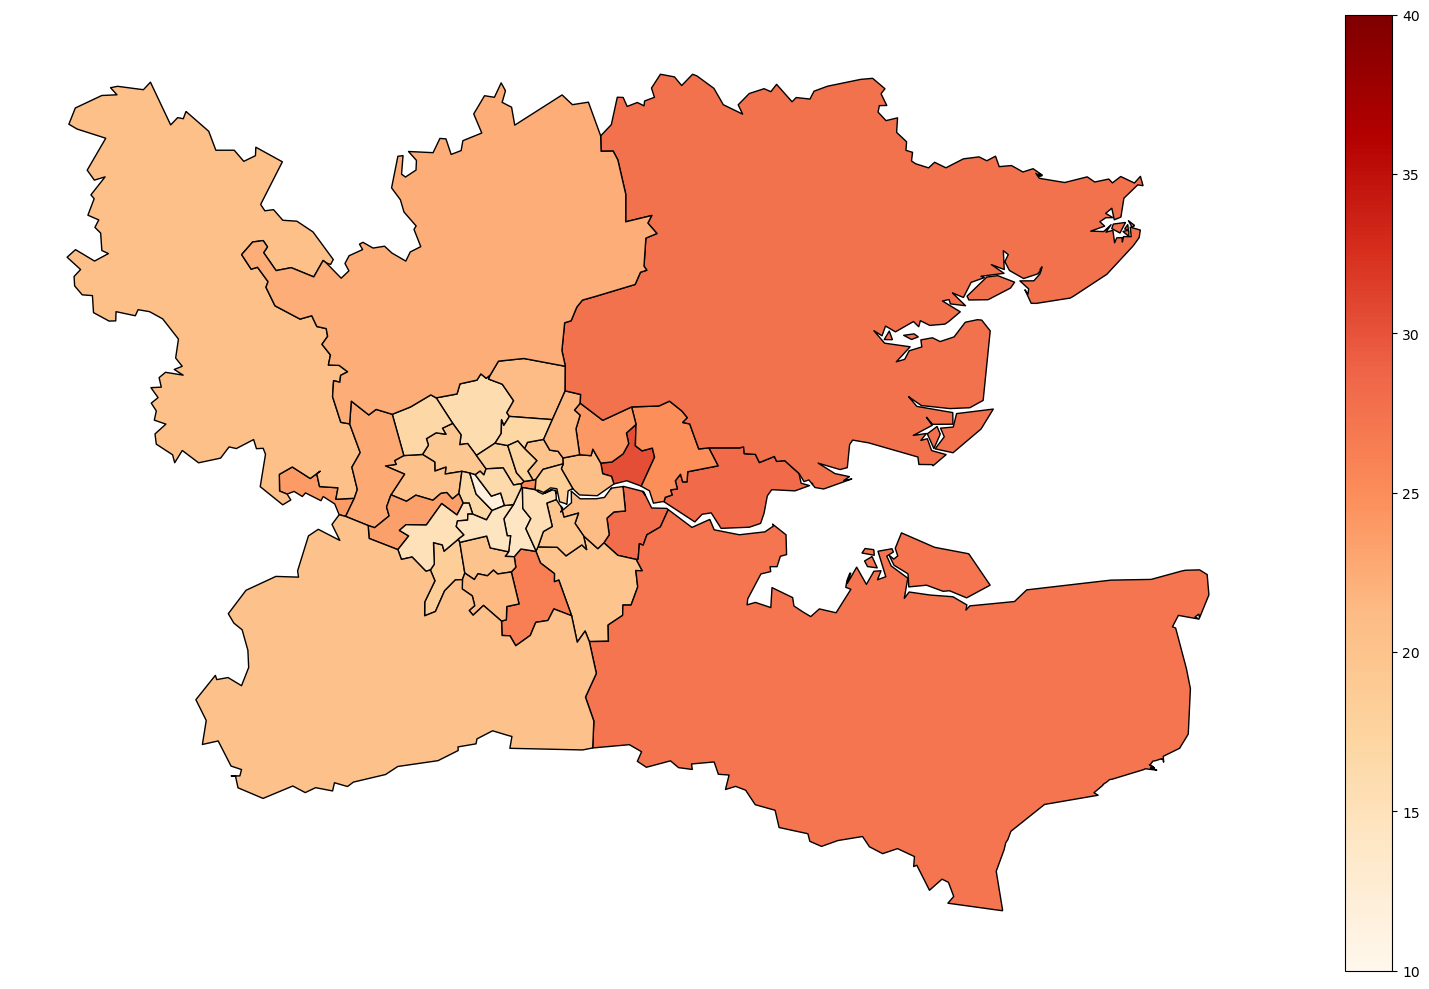

In [28]:

# 设定颜色映射的最小值和最大值
vmin = 10
vmax = 40
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_obesity.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('obesity2021_伦敦区域.png',bbox_inches='tight')

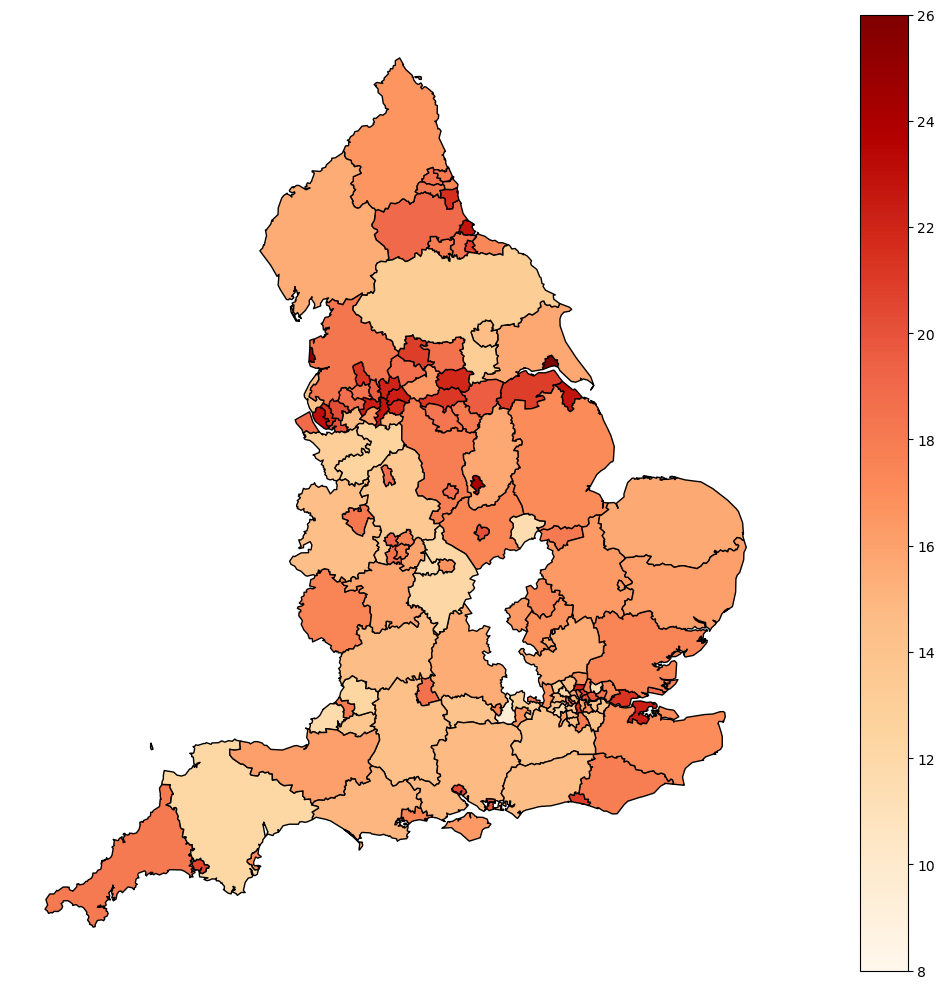

In [29]:
gdf_smoke = England.merge(smoke, on='Area code')
fig1, ax1 = plt.subplots(figsize=(16, 10))

vmin = 8
vmax = 26
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

gdf_smoke.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('smoke2015.png',bbox_inches='tight')

# 显示图表
# plt.show()


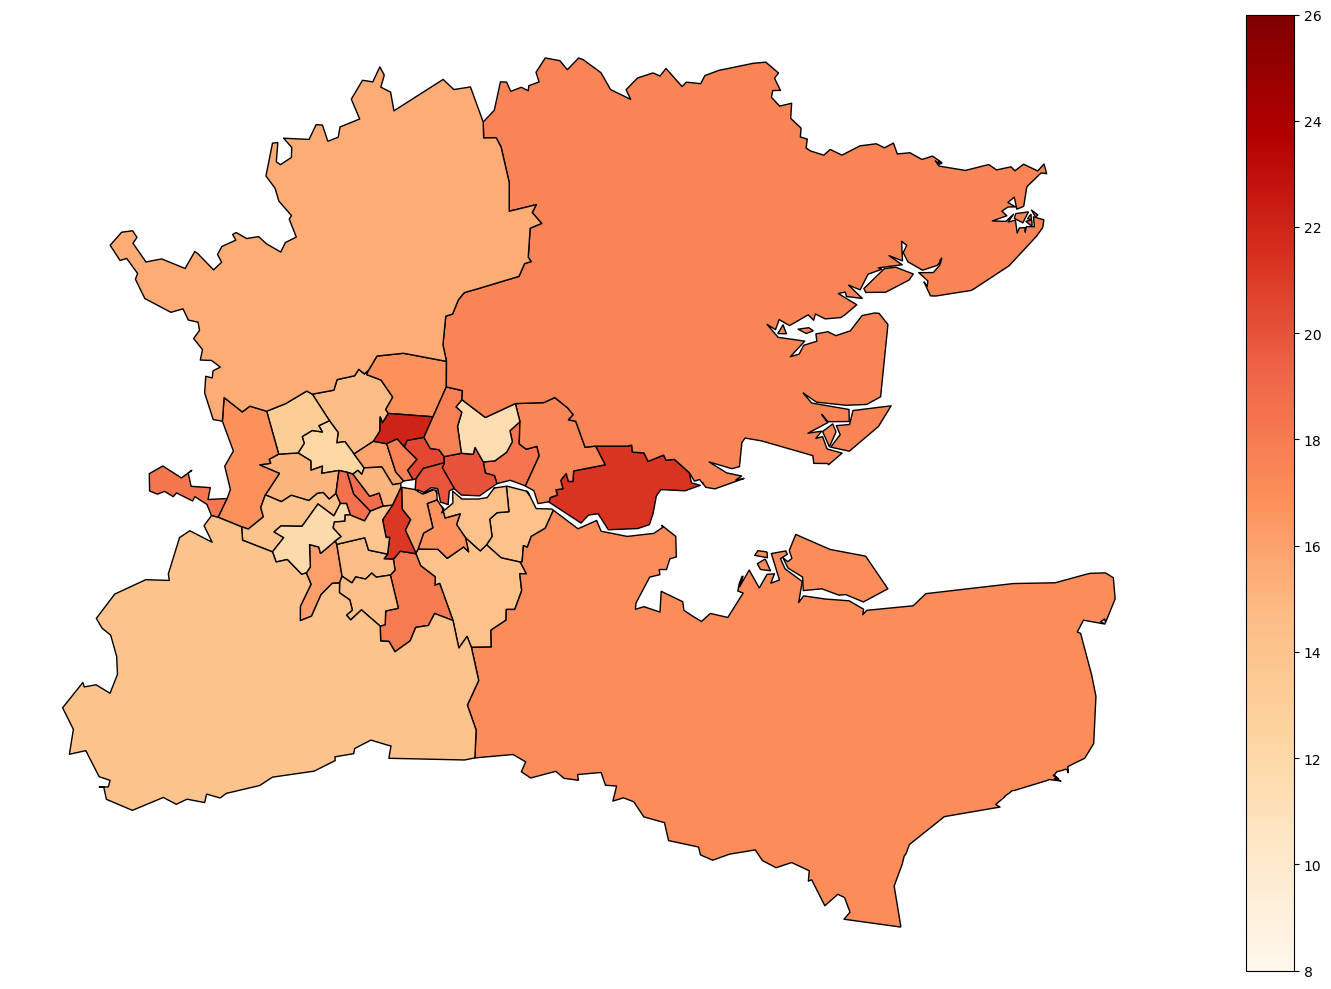

In [30]:
vmin = 8
vmax = 26
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

gdf_smoke = gdf_smoke.to_crs(epsg=4326)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_smoke.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('smoke2015_伦敦区域.png',bbox_inches='tight')

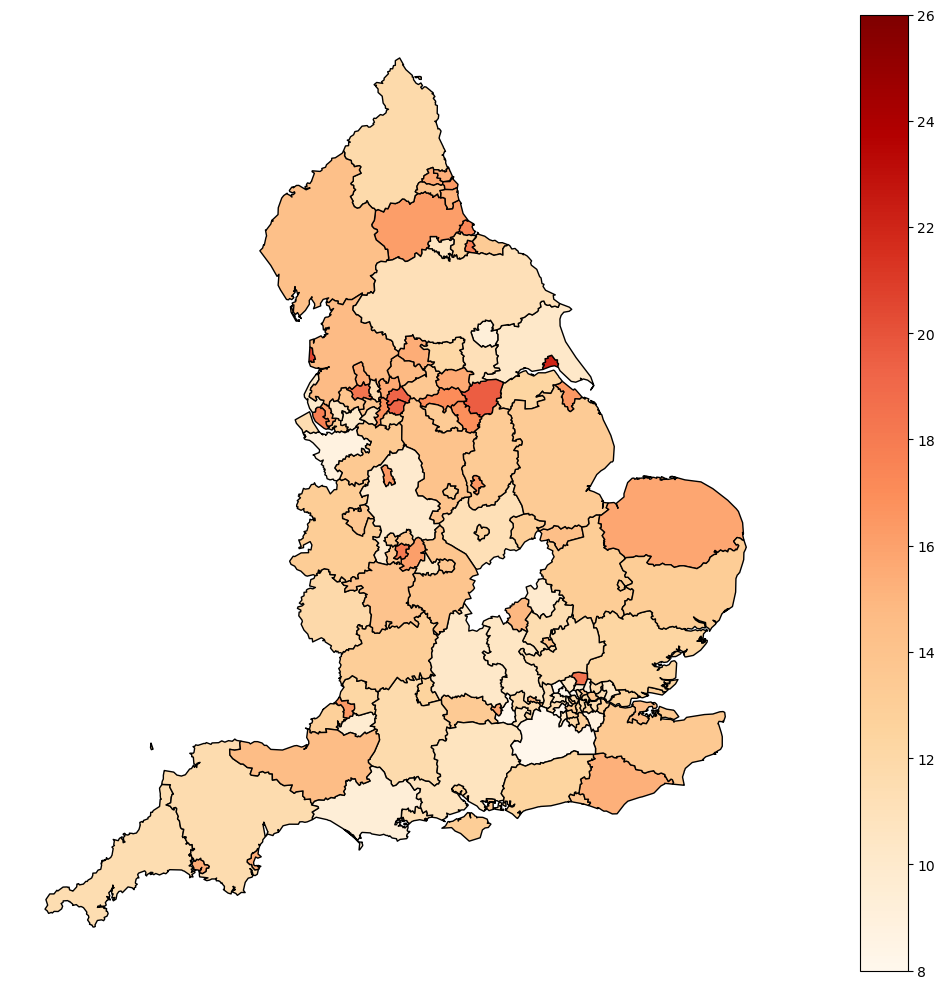

In [31]:
gdf_smoke = England.merge(smoke, on='Area code')
fig1, ax1 = plt.subplots(figsize=(16, 10))

vmin = 8
vmax = 26
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

gdf_smoke.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('smoke2021.png',bbox_inches='tight')

# 显示图表
# plt.show()

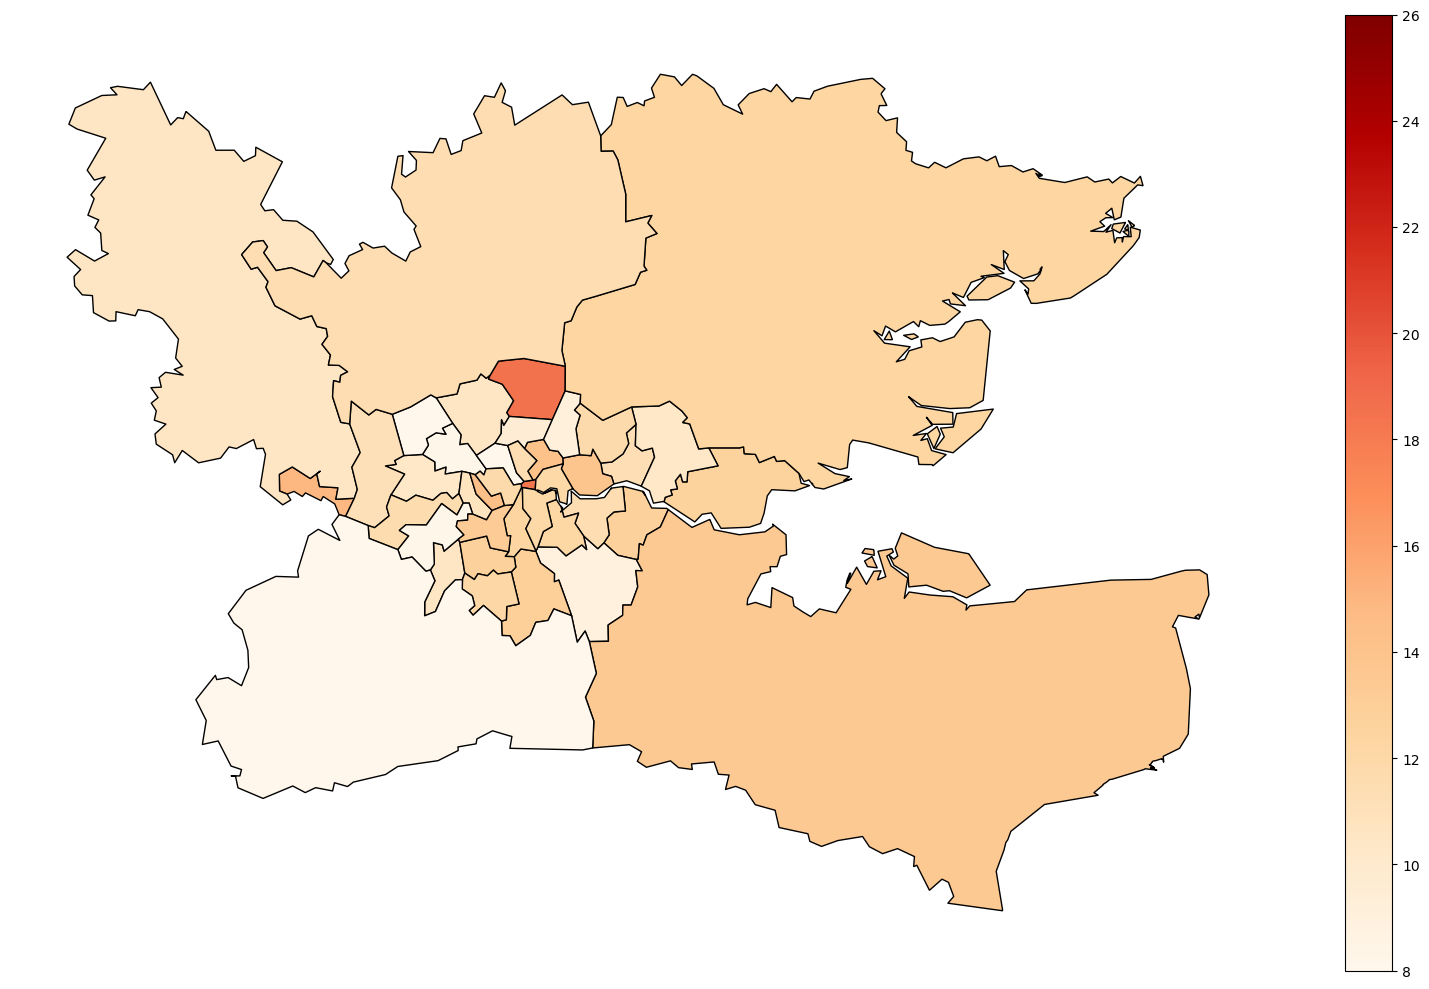

In [32]:
vmin = 8
vmax = 26
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

gdf_smoke = gdf_smoke.to_crs(epsg=4326)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_smoke.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('smoke2021_伦敦区域.png', bbox_inches='tight')

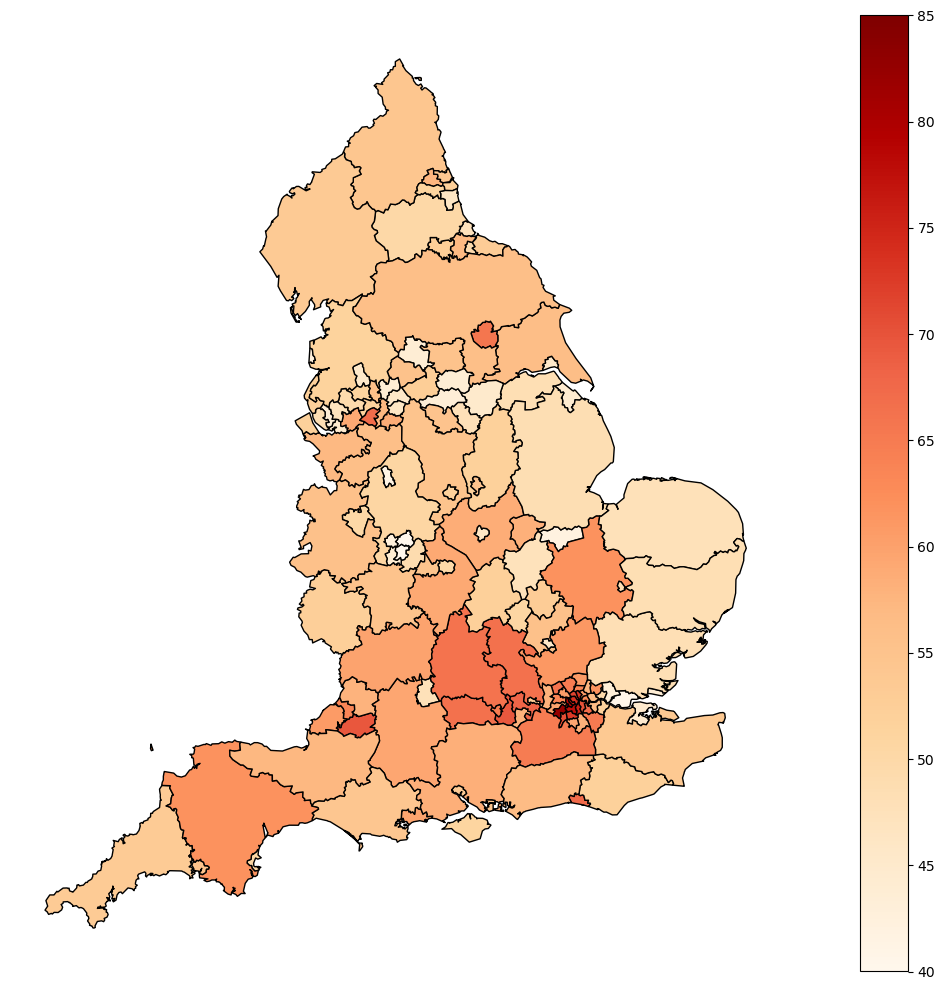

In [33]:
gdf_learn = England.merge(learn, on='Area code')
fig1, ax1 = plt.subplots(figsize=(16, 10))

vmin = 40
vmax = 85
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


gdf_learn.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('learn2015.png',bbox_inches='tight')


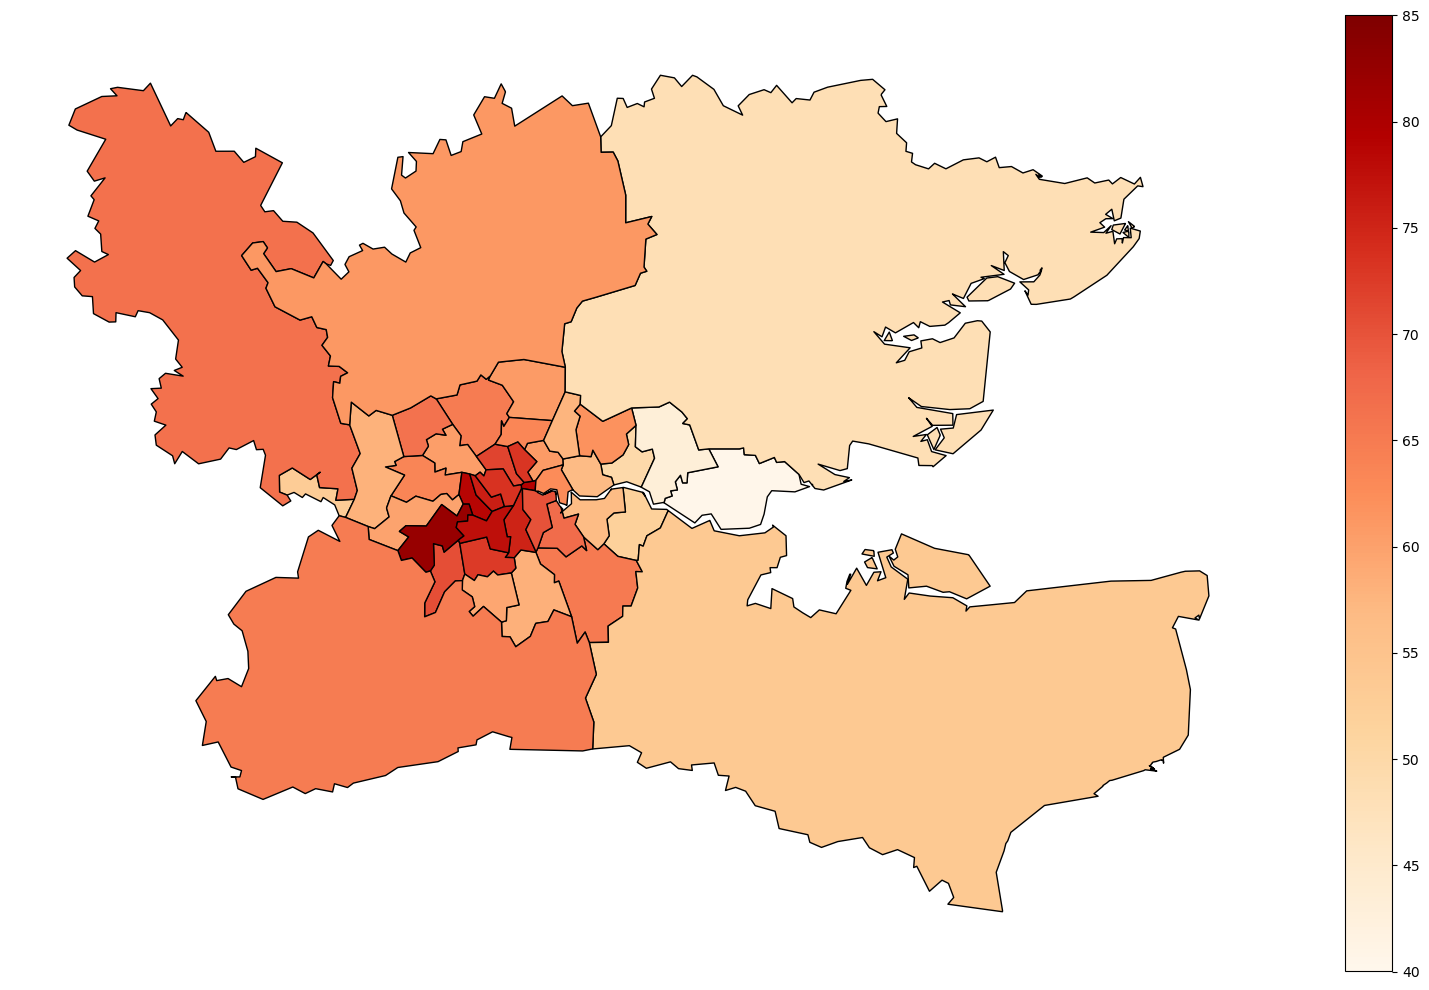

In [34]:

vmin = 40
vmax = 85
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

gdf_learn = gdf_learn.to_crs(epsg=4326)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_learn.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('learn2015_伦敦区域.png',bbox_inches='tight')

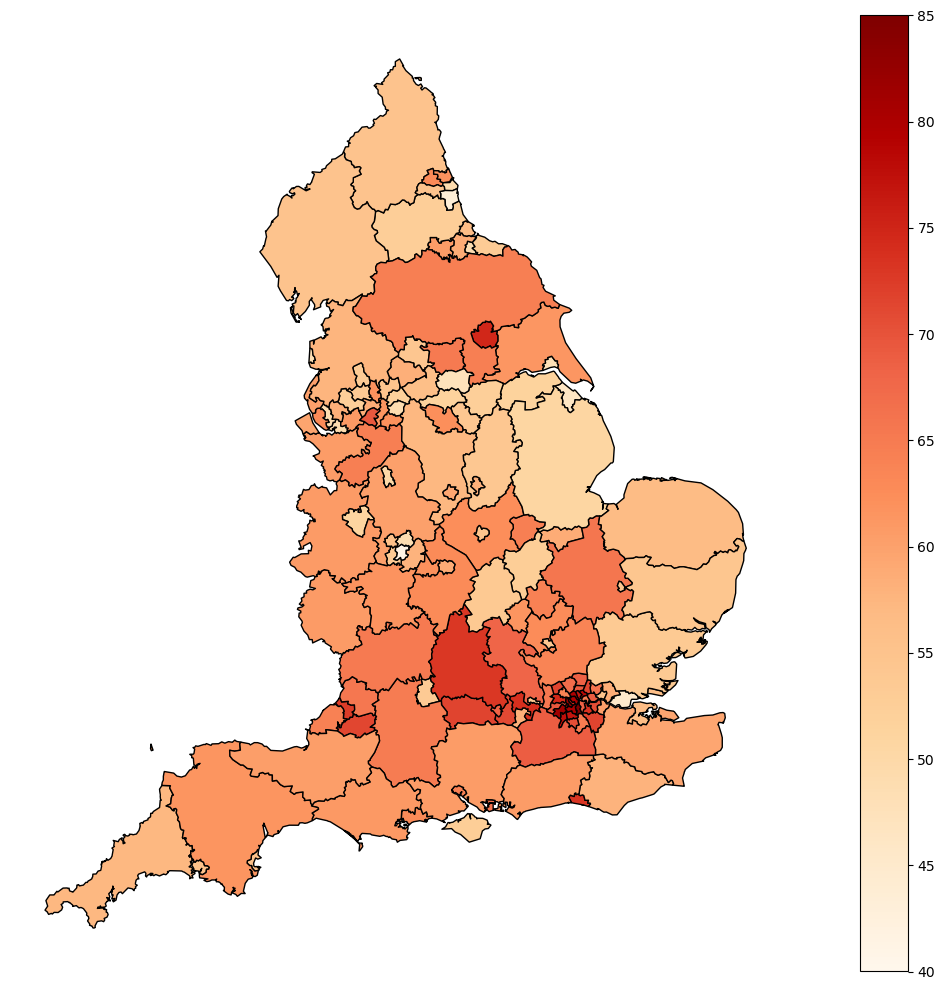

In [35]:
gdf_learn = England.merge(learn, on='Area code')
fig1, ax1 = plt.subplots(figsize=(16, 10))

vmin = 40
vmax = 85
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


gdf_learn.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('learn2021.png',bbox_inches='tight')


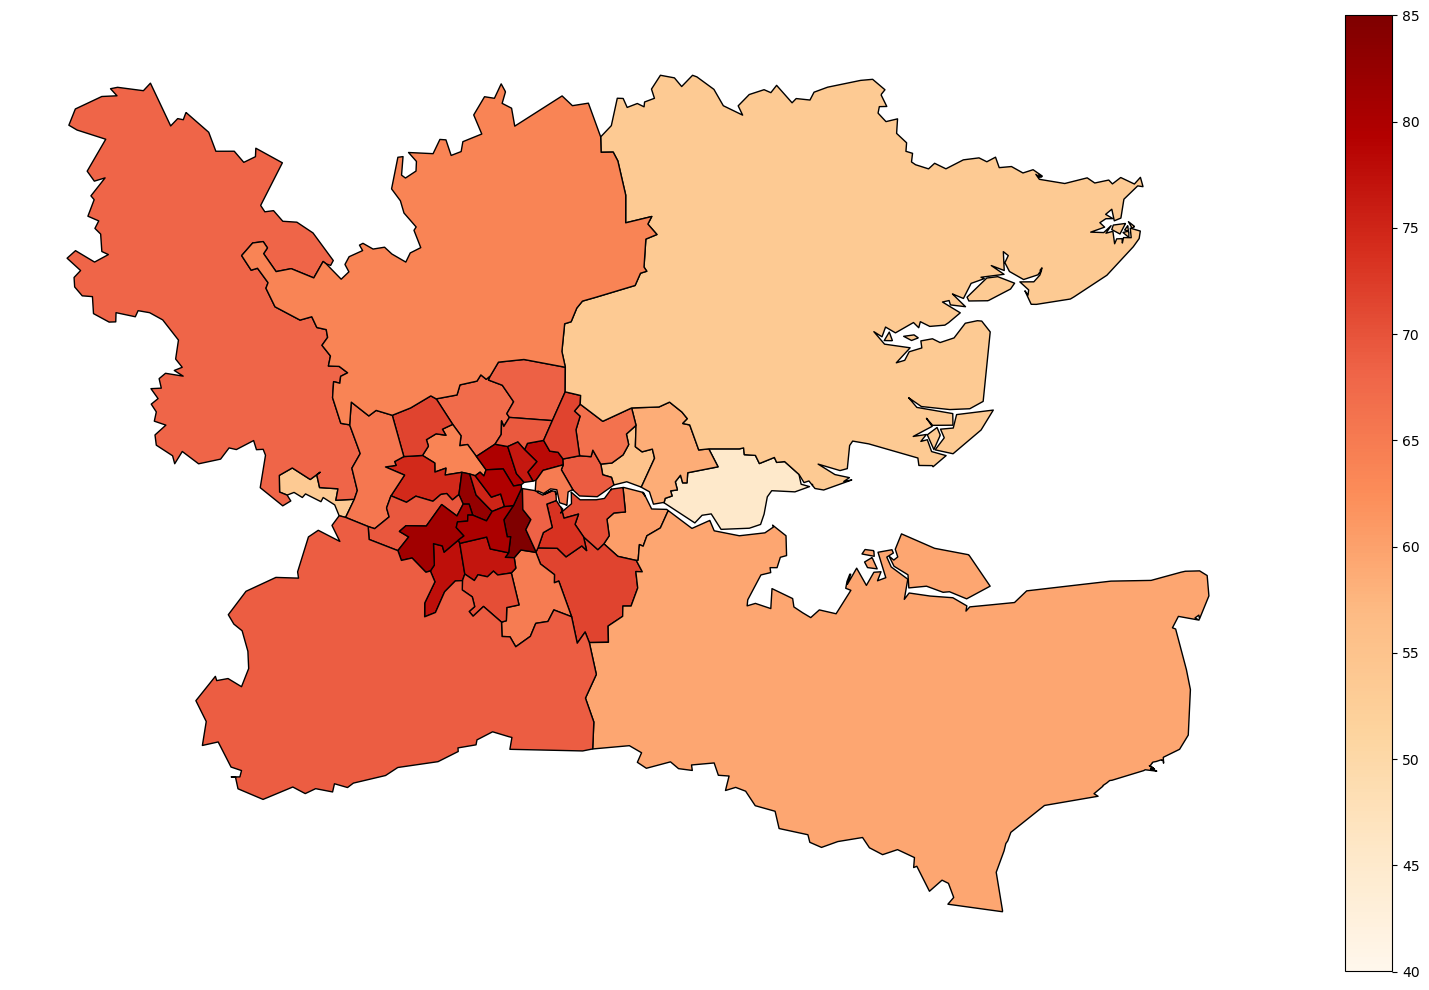

In [36]:
vmin = 40
vmax = 85
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

gdf_learn = gdf_learn.to_crs(epsg=4326)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_learn.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('learn2021_伦敦区域.png',bbox_inches='tight')

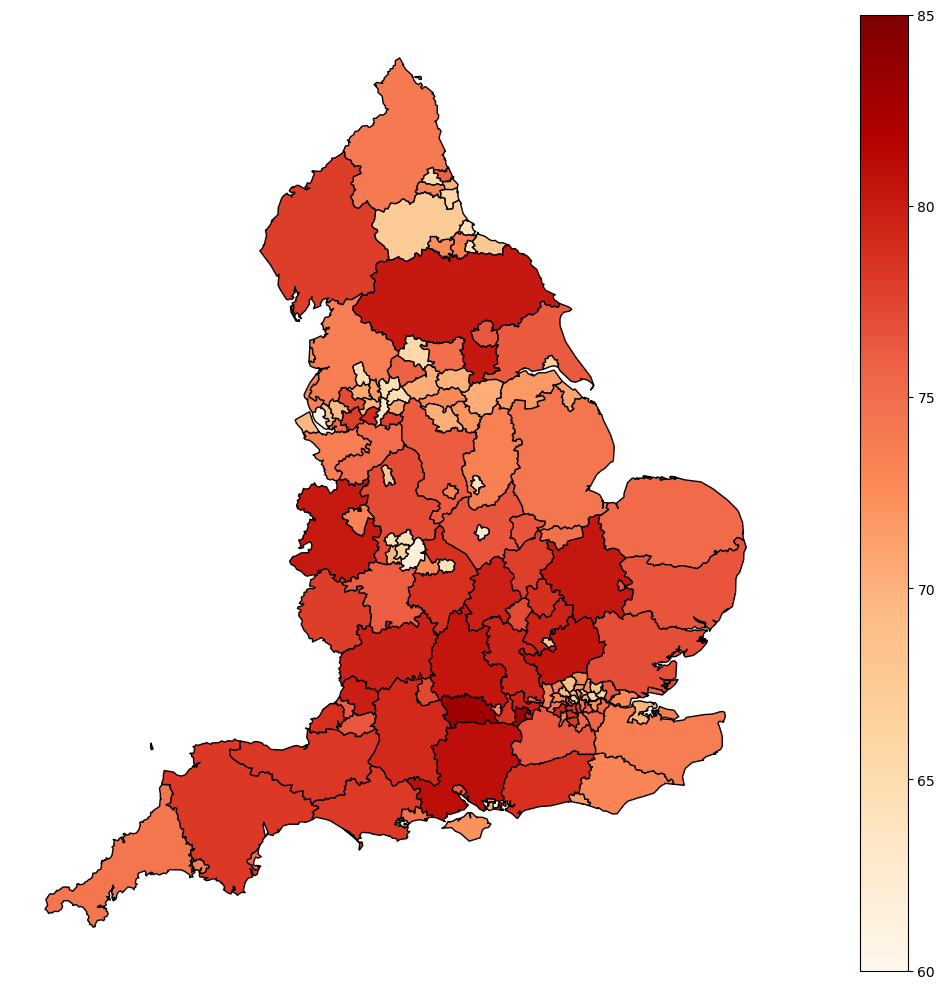

In [37]:
gdf_employment = England.merge(employment, on='Area code')
fig1, ax1 = plt.subplots(figsize=(16, 10))
vmin = 60
vmax = 85
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)



gdf_employment.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('employment2015.png',bbox_inches='tight')


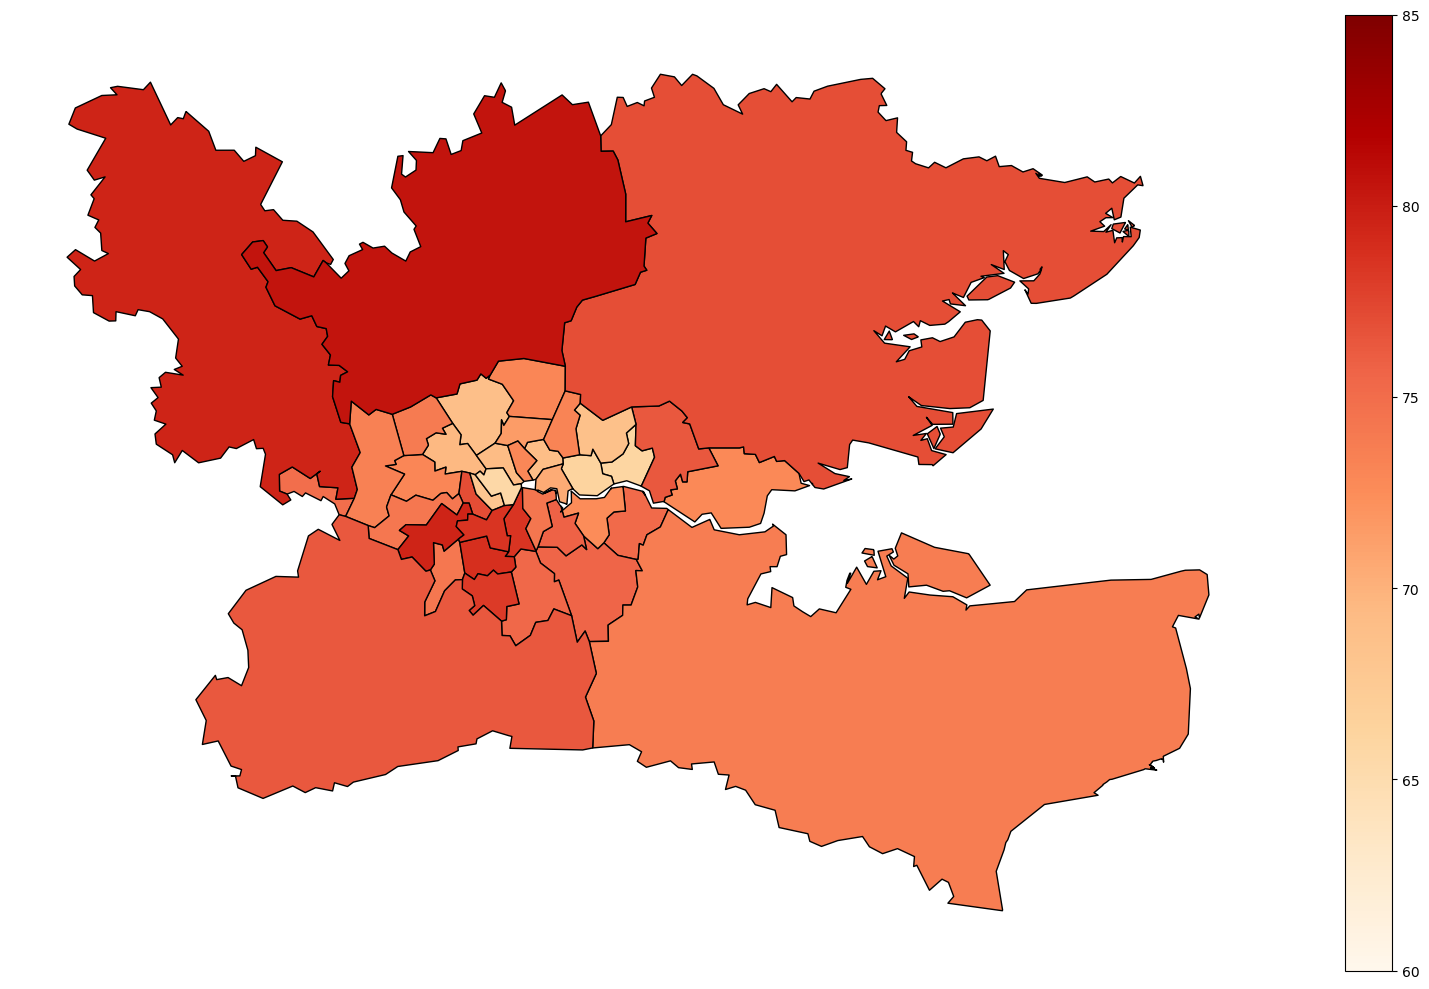

In [38]:
vmin = 60
vmax = 85
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
gdf_employment = gdf_employment.to_crs(epsg=4326)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_employment.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('employment2015_伦敦区域.png',bbox_inches='tight')

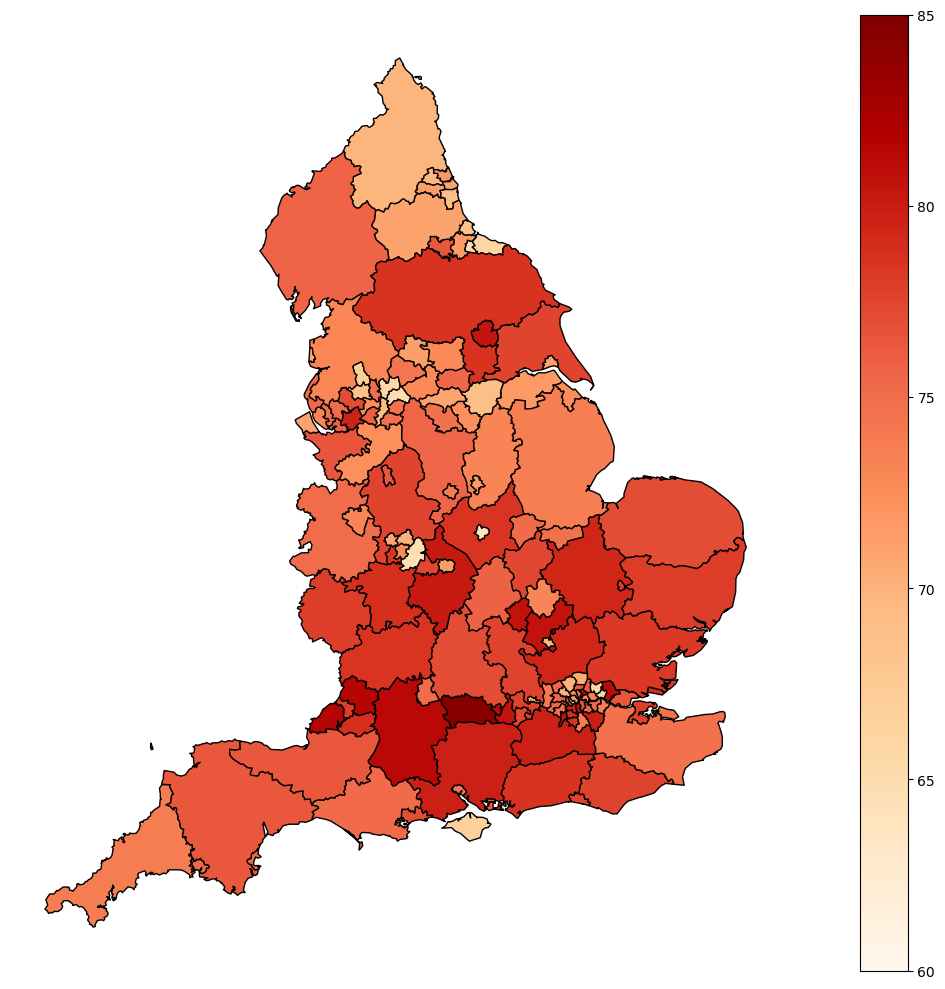

In [39]:
gdf_employment = England.merge(employment, on='Area code')
fig1, ax1 = plt.subplots(figsize=(16, 10))
vmin = 60
vmax = 85
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)



gdf_employment.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('employment2021.png',bbox_inches='tight')

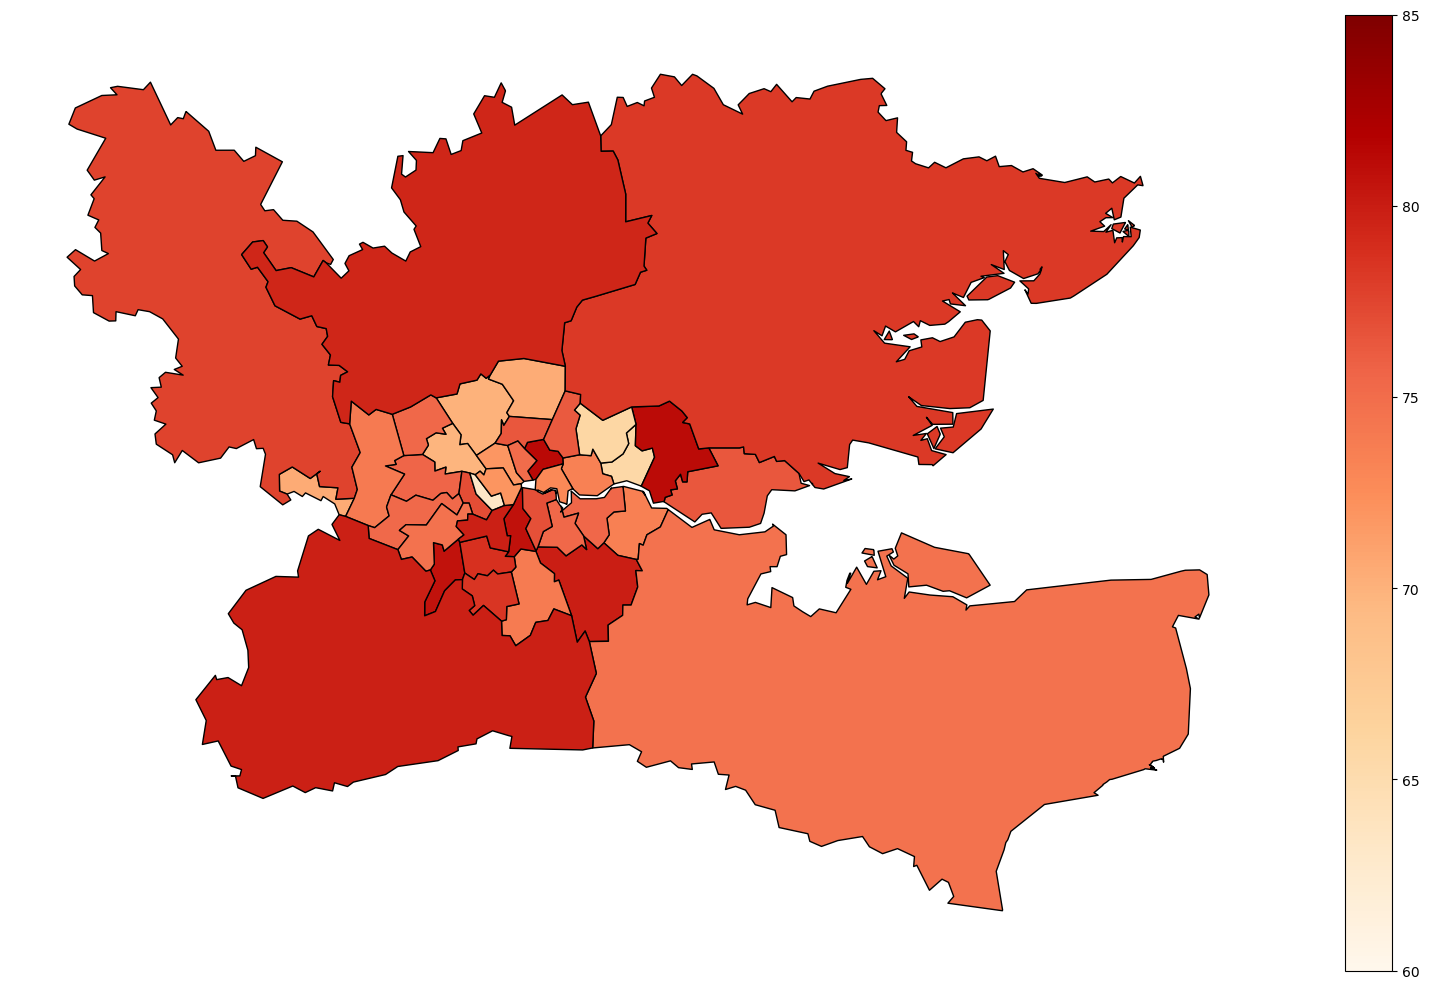

In [40]:
vmin = 60
vmax = 85
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
gdf_employment = gdf_employment.to_crs(epsg=4326)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_employment.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('employment2021_伦敦区域.png',bbox_inches='tight')

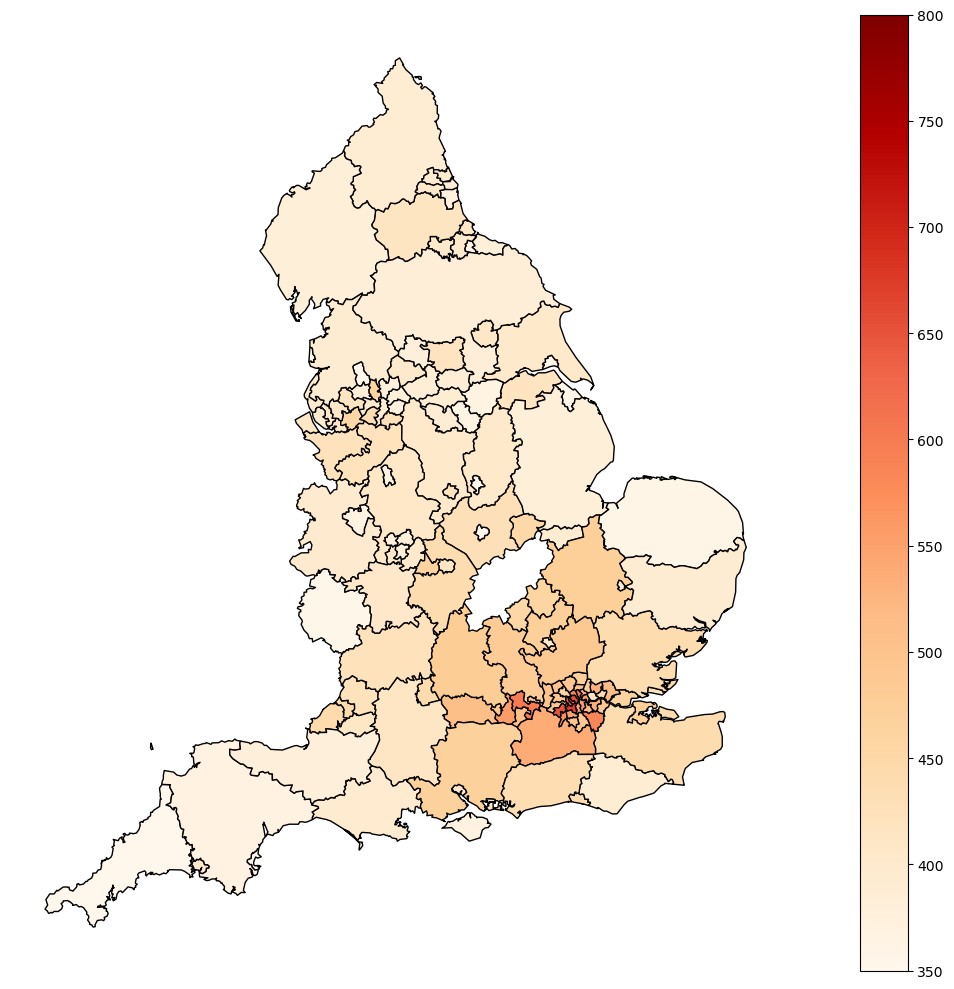

In [41]:
gdf_pay = England.merge(pay, on='Area code')
fig1, ax1 = plt.subplots(figsize=(16, 10))
vmin = 350
vmax = 800
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

gdf_pay.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('pay2015.png',bbox_inches='tight')

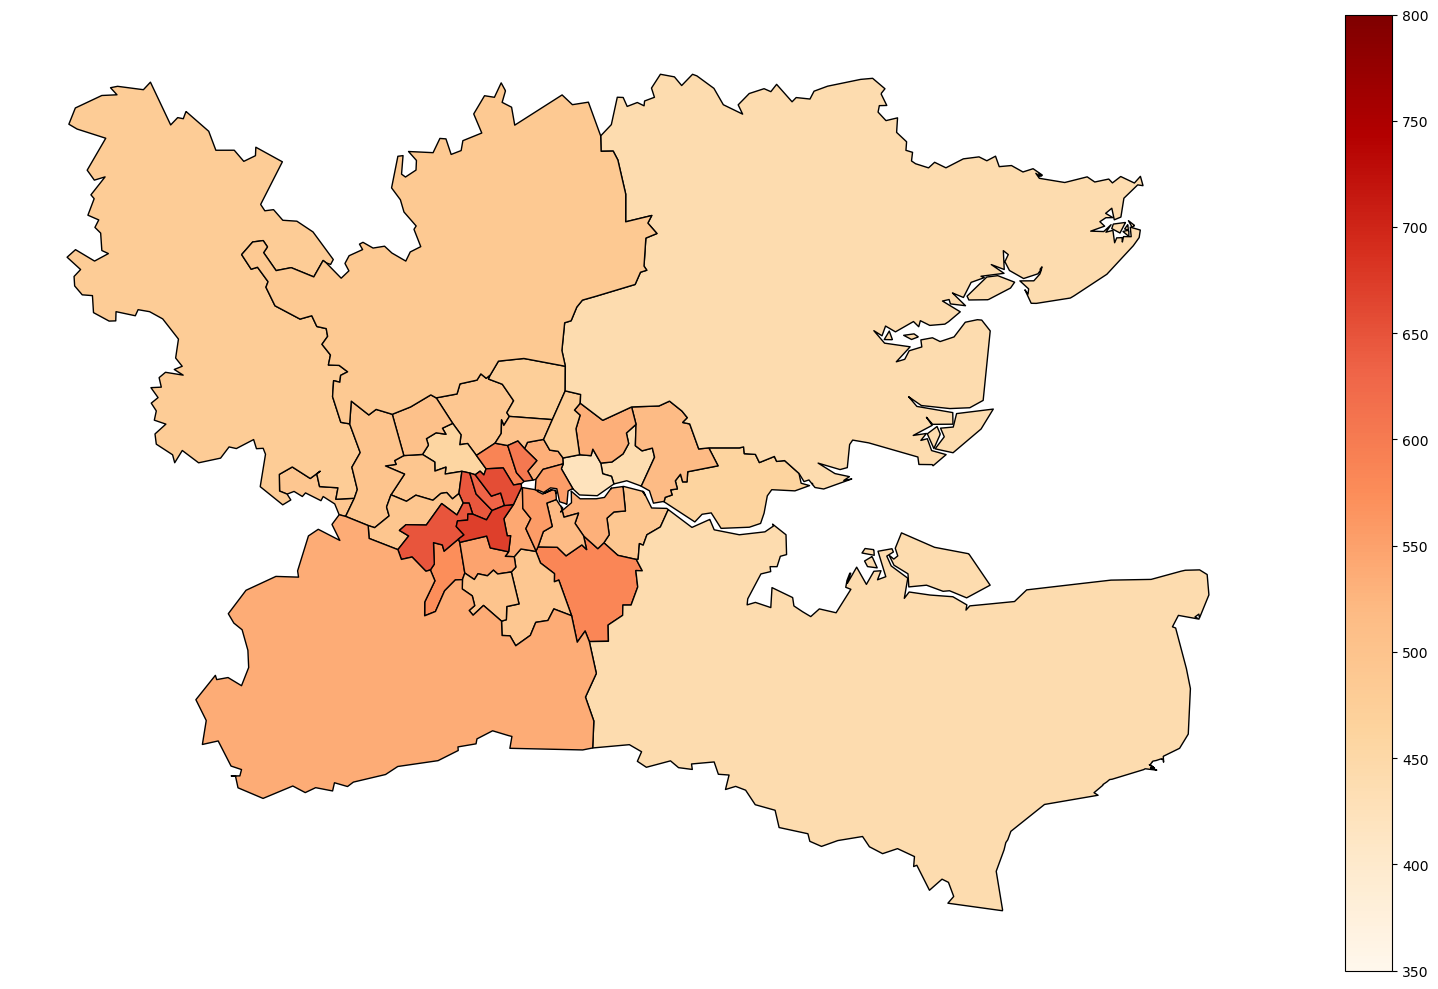

In [42]:
vmin = 350
vmax = 800
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
gdf_pay = gdf_pay.to_crs(epsg=4326)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_pay.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2015', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('pay2015_伦敦区域.png',bbox_inches='tight')

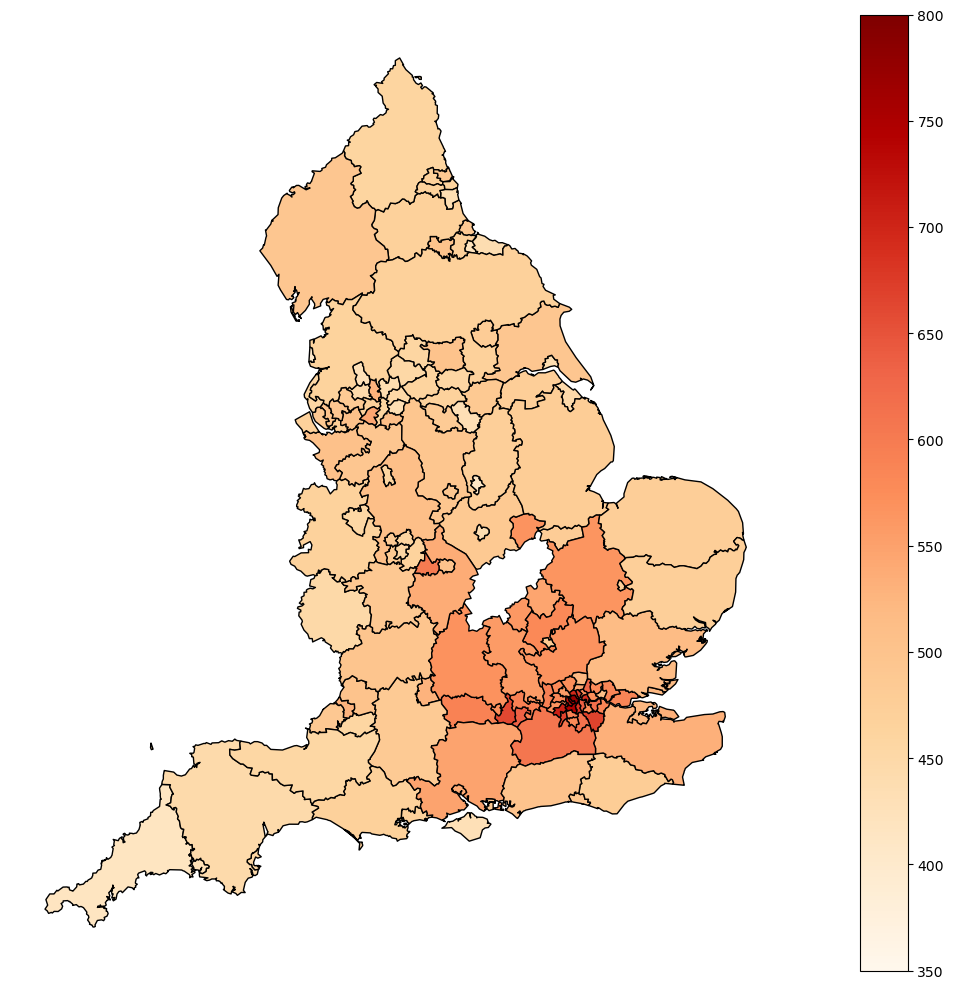

In [43]:
gdf_pay = England.merge(pay, on='Area code')
fig1, ax1 = plt.subplots(figsize=(16, 10))
vmin = 350
vmax = 800
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

gdf_pay.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('pay2021.png',bbox_inches='tight')

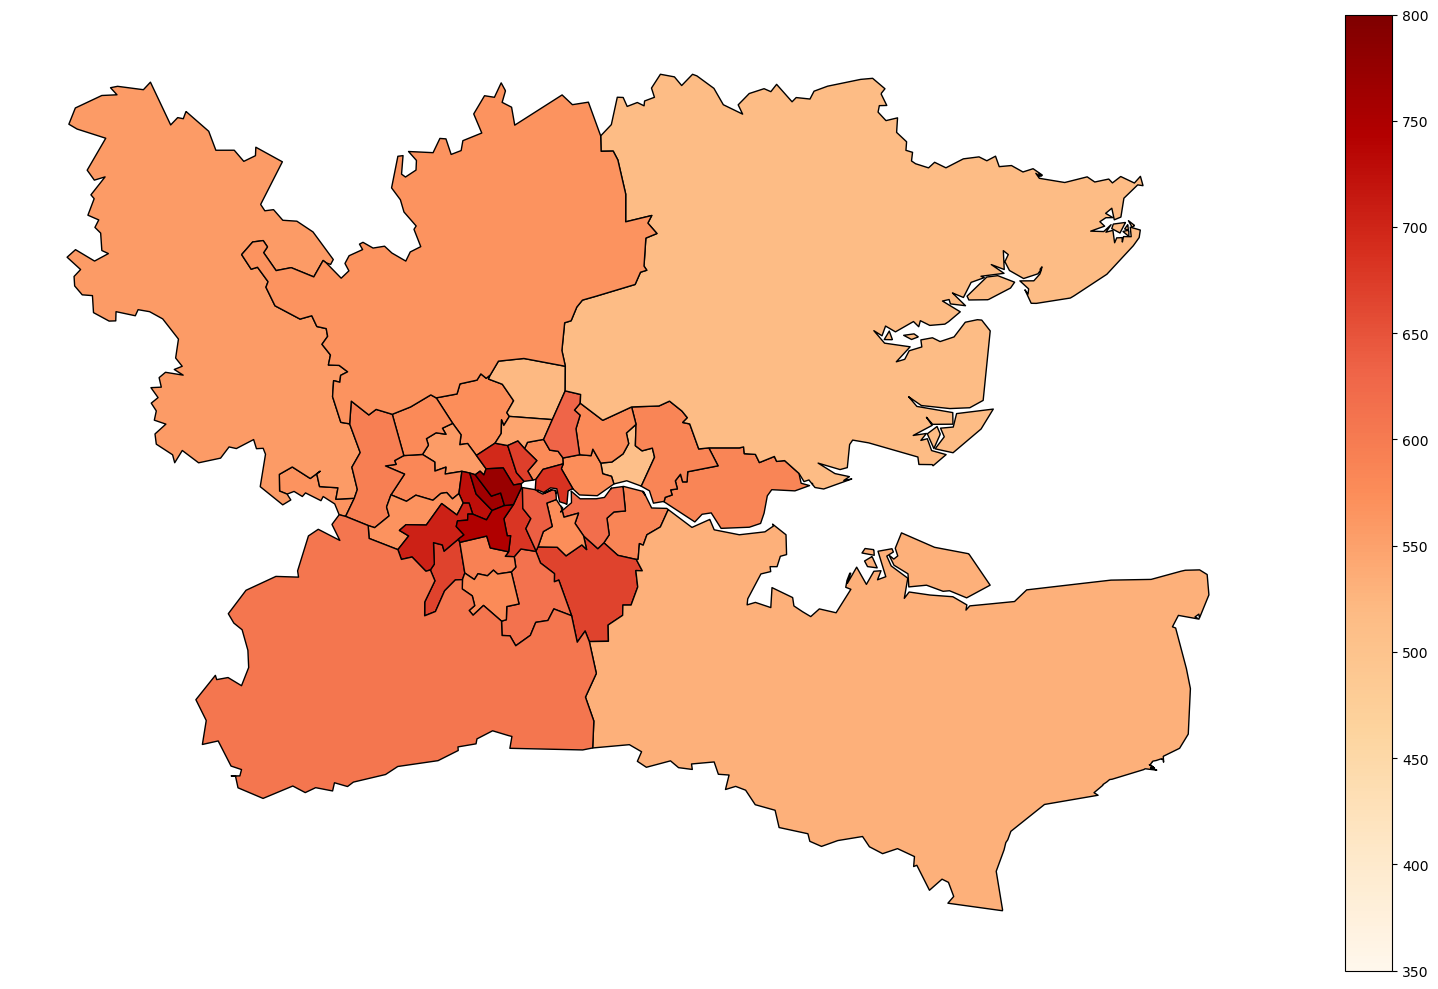

In [44]:
vmin = 350
vmax = 800
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
gdf_pay = gdf_pay.to_crs(epsg=4326)

# 指定伦敦区域的经纬度范围
xmin, xmax = -0.5103751, 0.3340155
ymin, ymax = 51.2867602, 51.6918741

# 裁剪伦敦区域
gdf_zoomed = gdf_pay.cx[xmin:xmax, ymin:ymax]

# 绘制2015年伦敦区域的肥胖率地图
fig1, ax1 = plt.subplots(figsize=(16, 10))
gdf_zoomed.plot(column='2021', cmap='OrRd', norm=norm, legend=True, ax=ax1, edgecolor='k')
ax1.set_axis_off()
plt.tight_layout()
plt.savefig('pay2021_伦敦区域.png',bbox_inches='tight')

In [45]:
year = '2021'
wellbeingYear2 = 'April 2020 to March 2021'
wellbeingYear = 'April 2021 to March 2022'
pay_selected = pay[['Area code',year]]
pay_selected = pay_selected.rename(columns={year: 'pay_selected_'+year})

employment_selected = employment[['Area code',year]]
employment_selected = employment_selected.rename(columns={year: 'employment_selected_'+year})

learn_selected = learn[['Area code',year]]
learn_selected = learn_selected.rename(columns={year: 'learn_selected_'+year})

smoke_selected = smoke[['Area code',year]]
smoke_selected = smoke_selected.rename(columns={year: 'smoke_selected_'+year})

obesity_selected = obesity[['Area code',year]]
obesity_selected = obesity_selected.rename(columns={year: 'obesity_selected_'+year})

wellbeing_selected = wellbeing[['Area code',wellbeingYear]] 

wellbeing_selected2 = wellbeing[['Area code',wellbeingYear2]] 

dfs = [wellbeing_selected, pay_selected, learn_selected, smoke_selected, obesity_selected, employment_selected, wellbeing_selected2]
# dfs = [wellbeing_selected, pay_selected, learn_selected, smoke_selected, obesity_selected, employment_selected]


result = dfs[0]

# newpd = pd.merge(wellbeing, pay_selected, on='Area code', how='outer')
for df in dfs[1:]:
    result = result.merge(df, on='Area code', how='outer')

gdf = England.merge(result, on='Area code')
gdf[[wellbeingYear,wellbeingYear2]] = gdf[[wellbeingYear,wellbeingYear2]].apply(pd.to_numeric, errors='coerce')
# gdf[[wellbeingYear]] = gdf[[wellbeingYear]].apply(pd.to_numeric, errors='coerce')


In [46]:
gdf

Area code             CTYUA21NM   BNG_E   BNG_N     LONG      LAT  \
0    E06000001            Hartlepool  447160  531474 -1.27018  54.6761   
1    E06000002         Middlesbrough  451141  516887 -1.21099  54.5447   
2    E06000003  Redcar and Cleveland  464361  519597 -1.00608  54.5675   
3    E06000004      Stockton-on-Tees  444940  518183 -1.30664  54.5569   
4    E06000005            Darlington  428029  515648 -1.56835  54.5353   
..         ...                   ...     ...     ...      ...      ...   
146  E10000029               Suffolk  608219  266120  1.04919  52.2538   
147  E10000030                Surrey  515966  153408 -0.33911  51.2680   
148  E10000031          Warwickshire  429584  253588 -1.56874  52.1798   
149  E10000032           West Sussex  508316  118010 -0.45933  50.9513   
150  E10000034        Worcestershire  385792  257203 -2.20935  52.2129   

                                 GlobalID  \
0    e2ade4b3-57ad-40b3-9abd-510a3fad62fe   
1    fb585070-81ef-43e3-b191-6d185ba60a96   
2    4c8f257a-4b5a-4d03-b29d-5fdbdbabb816   
3    82dbad8f-46bf-4204-bd1f-45eab08a67b7   
4    cef6bbfd-ba19-4150-8a7d-4e24b8a5430a   
..                                    ...   
146  d7c07649-4c62-459d-9fa5-4647c4a320b3   
147  cc16bc04-f583-4829-a02a-565cdaac4d77   
148  80e6c673-2899-4215-81bf-39911cd44ee2   
149  d89e50cf-7879-4319-a4db-6e8c62ef3719   
150  3fb70392-24e2-4c36-ae65-dfcfbc7c391b   

                                              geometry  \
0    POLYGON ((448906.042 536703.720, 448926.003 53...   
1    POLYGON ((451894.353 521145.363, 453997.697 51...   
2    POLYGON ((478227.056 518780.442, 477689.303 51...   
3    POLYGON ((452185.284 526288.464, 451741.384 52...   
4    POLYGON ((436388.002 522354.197, 437351.702 52...   
..                                                 ...   
146  POLYGON ((651106.502 300527.104, 652813.502 29...   
147  MULTIPOLYGON (((486959.850 134505.300, 486289....   
148  POLYGON ((429849.397 299906.502, 432135.200 29...   
149  MULTIPOLYGON (((477033.697 102497.600, 476828....   
150  POLYGON ((381775.900 282326.504, 388692.204 28...   

     April 2021 to March 2022  pay_selected_2021  learn_selected_2021  \
0                        7.42              489.3                 56.4   
1                        7.50              422.0                 48.7   
2                        7.50              436.6                 53.3   
3                        7.30              471.4                 58.8   
4                        7.37              502.4                 60.7   
..                        ...                ...                  ...   
146                      7.81              473.1                 54.5   
147                      7.58              606.7                 69.0   
148                      7.63              537.4                 62.7   
149                      7.69              500.0                 60.6   
150                      7.52              490.2                 61.7   

     smoke_selected_2021  obesity_selected_2021  employment_selected_2021  \
0                   17.3               35.35587                      68.6   
1                   17.9               35.29352                      65.3   
2                   13.3               34.80189                      65.9   
3                   12.5               32.84926                      71.6   
4                   10.6               29.99722                      76.5   
..                   ...                    ...                       ...   
146                 13.2               27.57576                      78.0   
147                  7.8               20.28257                      79.8   
148                 13.9               25.99205                      80.2   
149                 12.4               23.10040                      78.6   
150                 14.0               26.69364                      78.8   

     April 2020 to March 2021  
0                        7.33  
1           

In [47]:
result.isnull()
mask = result.isna().any(axis=1)
rows_with_nan = result[mask]

print("含有空值的行：")
print(rows_with_nan)


含有空值的行：
    Area code  April 2021 to March 2022  pay_selected_2021  \
55  E06000061                      7.50                NaN   
59  E06000062                      7.66                NaN   
86  E09000001                       NaN                NaN   

    learn_selected_2021  smoke_selected_2021  obesity_selected_2021  \
55                 52.8                  NaN               28.60479   
59                 53.8                  NaN               29.17581   
86                  NaN                 18.3               25.22979   

    employment_selected_2021  April 2020 to March 2021  
55                      77.4                      7.42  
59                      75.9                      7.55  
86                       NaN                       NaN  


In [48]:
variable_names = ['pay_selected_'+year,'learn_selected_'+year,'smoke_selected_'+year,'obesity_selected_'+year,'employment_selected_'+year]
variable_names2 = ['pay_selected_'+year,'learn_selected_'+year,'smoke_selected_'+year,'obesity_selected_'+year,'employment_selected_'+year,wellbeingYear2]

In [49]:
for var in [wellbeingYear] + variable_names2:
    known_points = gdf.dropna(subset=[var])
    x_known = known_points['LONG'].values
    y_known = known_points['LAT'].values
    values_known = known_points[var].values

    # 构建普通克里金插值模型 自动设置h
    OK = OrdinaryKriging(
        x_known, y_known, values_known,
        variogram_model='linear',  # 选择线性变异函数模型
        verbose=False,
        enable_plotting=False
    )

    # 对缺失值点进行插值
    missing_points = gdf[gdf[var].isna()]
    x_missing = missing_points['LONG'].values
    y_missing = missing_points['LAT'].values
    z_missing, ss = OK.execute('points', x_missing, y_missing)

    # 填补缺失值
    gdf.loc[gdf[var].isna(), var] = z_missing

print(gdf)

gdf_space = gdf

     Area code             CTYUA21NM   BNG_E   BNG_N     LONG      LAT  \
0    E06000001            Hartlepool  447160  531474 -1.27018  54.6761   
1    E06000002         Middlesbrough  451141  516887 -1.21099  54.5447   
2    E06000003  Redcar and Cleveland  464361  519597 -1.00608  54.5675   
3    E06000004      Stockton-on-Tees  444940  518183 -1.30664  54.5569   
4    E06000005            Darlington  428029  515648 -1.56835  54.5353   
..         ...                   ...     ...     ...      ...      ...   
146  E10000029               Suffolk  608219  266120  1.04919  52.2538   
147  E10000030                Surrey  515966  153408 -0.33911  51.2680   
148  E10000031          Warwickshire  429584  253588 -1.56874  52.1798   
149  E10000032           West Sussex  508316  118010 -0.45933  50.9513   
150  E10000034        Worcestershire  385792  257203 -2.20935  52.2129   

                                 GlobalID  \
0    e2ade4b3-57ad-40b3-9abd-510a3fad62fe   
1    fb585070-81ef-43

In [50]:
w = libpysal.weights.Queen.from_dataframe(gdf)

# 计算莫兰指数
moran_smoking = esda.Moran(gdf['smoke_selected_'+year], w)
moran_obesity = esda.Moran(gdf['obesity_selected_'+year], w)
moran_pay = esda.Moran(gdf['pay_selected_'+year], w)
moran_learn = esda.Moran(gdf['learn_selected_'+year], w)
moran_employment = esda.Moran(gdf['employment_selected_'+year], w)


# 打印莫兰指数结果
print(f"Smoking Rate Moran's I: {moran_smoking.I}, p-value: {moran_smoking.p_sim}")
print(f"Obesity Rate Moran's I: {moran_obesity.I}, p-value: {moran_obesity.p_sim}")
print(f"pay Rate Moran's I: {moran_pay.I}, p-value: {moran_pay.p_sim}")
print(f"learn Rate Moran's I: {moran_learn.I}, p-value: {moran_learn.p_sim}")
print(f"employment Rate Moran's I: {moran_employment.I}, p-value: {moran_employment.p_sim}")

('WARNING: ', 43, ' is an island (no neighbors)')
Smoking Rate Moran's I: 0.16867927387717577, p-value: 0.002
Obesity Rate Moran's I: 0.5351346236804908, p-value: 0.001
pay Rate Moran's I: 0.731263096434639, p-value: 0.001
learn Rate Moran's I: 0.5432782116575576, p-value: 0.001
employment Rate Moran's I: 0.2923803899581462, p-value: 0.001


In [51]:
variable_names = ['pay_selected_'+year,'smoke_selected_'+year,'employment_selected_'+year]
variable_names2 = ['pay_selected_'+year,'smoke_selected_'+year,'obesity_selected_'+year,wellbeingYear2]

In [52]:
# scaler = StandardScaler()
# gdf[variable_names] = pd.DataFrame(scaler.fit_transform(gdf[variable_names]), columns=gdf[variable_names].columns)


scaler = StandardScaler()
gdf[variable_names2] = pd.DataFrame(scaler.fit_transform(gdf[variable_names2]), columns=gdf[variable_names2].columns)


In [53]:
m1 = spreg.OLS(
    # Dependent variable
    gdf[wellbeingYear].values,
    # Independent variables
    gdf[variable_names].values,
    # Dependent variable name
    name_y="wellbeing",
    # Independent variable name
    name_x=variable_names,
)


In [54]:
print(m1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   wellbeing                Number of Observations:         151
Mean dependent var  :      7.5091                Number of Variables   :           4
S.D. dependent var  :      0.1455                Degrees of Freedom    :         147
R-squared           :      0.1491
Adjusted R-squared  :      0.1318
Sum squared residual:       2.703                F-statistic           :      8.5871
Sigma-square        :       0.018                Prob(F-statistic)     :   2.728e-05
S.E. of regression  :       0.136                Log likelihood        :      89.483
Sigma-square ML     :       0.018                Akaike info criterion :    -170.965
S.E of regression ML:      0.1338                Schwarz criterion     :    -158.896

-----------------------------------------------------------------------------

In [55]:

# result_cleaned_sp= result_cleaned.merge(England, on='Area code', how='left')
# knn = weights.KNN.from_dataframe(gdf, k=4)

# wx = (
#     result_cleaned_sp.filter(
#       regex='2016$'    
#     )
#     .apply(
#         lambda y: weights.spatial_lag.lag_spatial(knn, y)
#         # Rename the spatial lag, adding w_ to the original name
#     )
#     .rename(
#         columns=lambda c: "w_"
#         + c
#         # Remove the lag of the binary variable for apartments
#     )
# )

In [56]:
knn = weights.KNN.from_dataframe(gdf, k=3)

In [57]:
# Merge original variables with the spatial lags in `wx`
# slx_exog = result_cleaned_sp[variable_names].join(wx)
# Fit linear model with `spreg`
m8 = spreg.GM_Lag(
    # Dependent variable
    gdf[[wellbeingYear]].values,
    # Independent variables
    gdf[variable_names2].values,
    # Spatial weights matrix
    w=knn,
    # Dependent variable name
    name_y="wellbeing",
    # Independent variables names
    name_x=variable_names2,
)

In [58]:
print(m8.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   wellbeing                Number of Observations:         151
Mean dependent var  :      7.5091                Number of Variables   :           6
S.D. dependent var  :      0.1455                Degrees of Freedom    :         145
Pseudo R-squared    :      0.2907
Spatial Pseudo R-squared:  0.2811

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       6.1340477       1.7973880       3.4127565       0.0006431
   pay_selected_2021      -0.0349899       0.0141495      -2.4728697       0.0134033
 smoke_selected_2021      -0.0272897       0.0124669      -

In [81]:
data = {'variable': ['smoking rate', 'employment rate', 'pay rate'],
        'linear regression model ': [-0.051, 0.067, -0.050,],
         'spatial lag model': [-0.019, 0.020, 0]}

df = pd.DataFrame(data)

plt.figure(figsize=(16, 10))
df.plot(kind='bar', x='variable', y=['linear regression model ','spatial lag model'], color=['skyblue','orange'])
plt.xlabel('variable')
plt.ylabel('Values')
plt.xticks(rotation=0) 
plt.savefig('2016regression.png',bbox_inches='tight')

<Figure size 1600x1000 with 0 Axes>

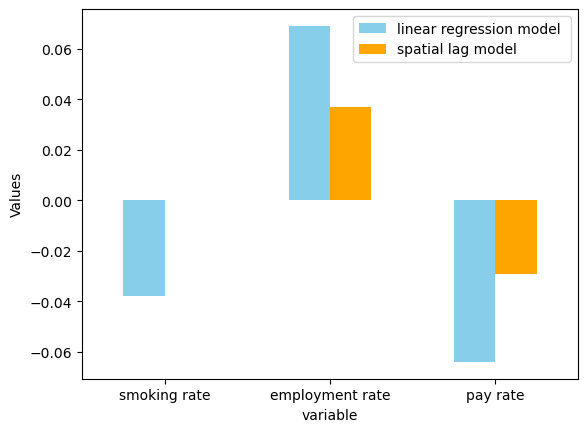

In [83]:

data = {'variable': ['smoking rate', 'employment rate', 'pay rate'],
        'linear regression model ': [-0.038, 0.069, -0.064],
         'spatial lag model': [0, 0.037, -0.029]}

df = pd.DataFrame(data)

plt.figure(figsize=(16, 10))
df.plot(kind='bar', x='variable', y=['linear regression model ','spatial lag model'], color=['skyblue','orange'])
plt.xlabel('variable')
plt.ylabel('Values')
plt.xticks(rotation=0) 
plt.savefig('2017regression.png',bbox_inches='tight')




In [84]:
data = {'variable': ['smoking rate', 'employment rate', 'pay rate'],
        'linear regression model ': [-0.036, 0.073, -0.046],
         'spatial lag model': [0, 0.037, 0]}

df = pd.DataFrame(data)

plt.figure(figsize=(16, 10))
df.plot(kind='bar', x='variable', y=['linear regression model ','spatial lag model'], color=['skyblue','orange'])
plt.xlabel('variable')
plt.ylabel('Values')
plt.xticks(rotation=0) 
plt.savefig('2018regression.png',bbox_inches='tight')



<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

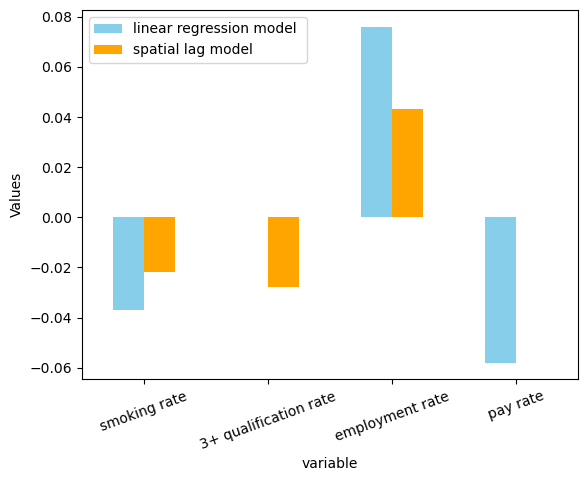

In [92]:
data = {'variable': ['smoking rate', '3+ qualification rate','employment rate', 'pay rate'],
        'linear regression model ': [-0.037, 0, 0.076, -0.058],
         'spatial lag model': [-0.022,-0.028, 0.043, 0]}

df = pd.DataFrame(data)

plt.figure(figsize=(16, 10))
df.plot(kind='bar', x='variable', y=['linear regression model ','spatial lag model'], color=['skyblue','orange'])
plt.xlabel('variable')
plt.ylabel('Values')
plt.xticks(rotation=20) 
plt.savefig('2019regression.png',bbox_inches='tight')


In [96]:
data = {'variable': ['smoking rate', '3+ qualification rate','employment rate', 'pay rate'],
        'linear regression model ': [-0.032, -0.058, 0.059, 0],
         'spatial lag model': [0,0, 0, 0]}

df = pd.DataFrame(data)

plt.figure(figsize=(16, 10))
df.plot(kind='bar', x='variable', y=['linear regression model ','spatial lag model'], color=['skyblue','orange'])
plt.xlabel('variable')
plt.ylabel('Values')

plt.xticks(rotation=20) 
plt.savefig('2020regression.png',bbox_inches='tight')

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

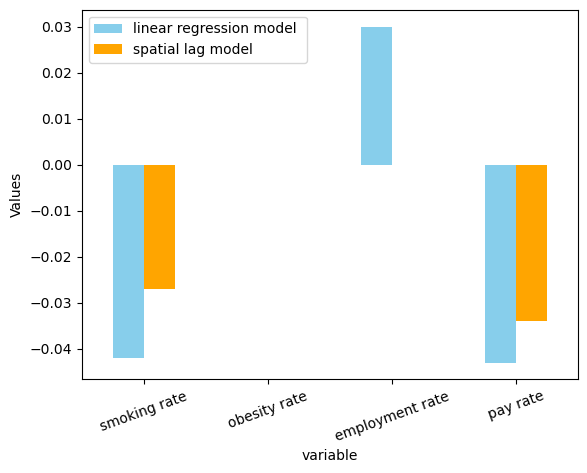

In [104]:
data = {'variable': ['smoking rate','obesity rate','employment rate', 'pay rate'],
        'linear regression model ': [-0.042,0, 0.030, -0.043],
         'spatial lag model': [-0.027,0,0, -0.034]}

df = pd.DataFrame(data)

plt.figure(figsize=(16, 10))
df.plot(kind='bar', x='variable', y=['linear regression model ','spatial lag model'], color=['skyblue','orange'])
plt.xlabel('variable')
plt.ylabel('Values')
plt.xticks(rotation=20) 
plt.savefig('2021regression.png',bbox_inches='tight')

<Figure size 1600x1000 with 0 Axes>

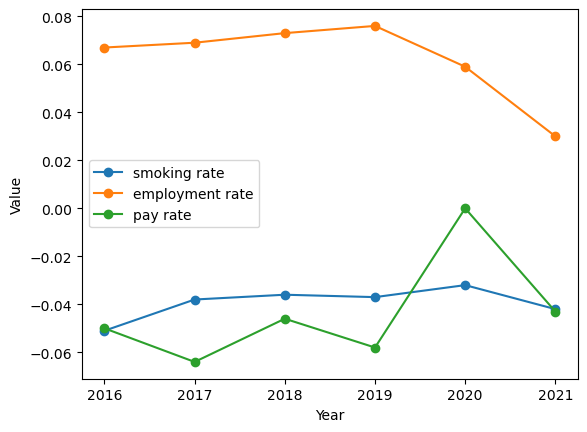

In [102]:
data = {
    'year': ['2016', '2017', '2018','2019','2020','2021'],
    'smoking rate': [-0.051,-0.038	,-0.036	,-0.037	,-0.032	,-0.042],
    'employment rate':[0.067,	0.069,	0.073,	0.076,	0.059	,0.030],
    'pay rate':[-0.050	,-0.064,	-0.046	,-0.058	,0,-0.043]
}

df = pd.DataFrame(data)
plt.figure(figsize=(16, 10))  # 可选: 调整图表大小
df.plot(kind='line', x='year', y=['smoking rate','employment rate','pay rate'], marker='o')

# 添加标题和标签
plt.xlabel('Year')
plt.ylabel('Value')
plt.savefig('regression_line.png',bbox_inches='tight')

<Figure size 1600x1000 with 0 Axes>

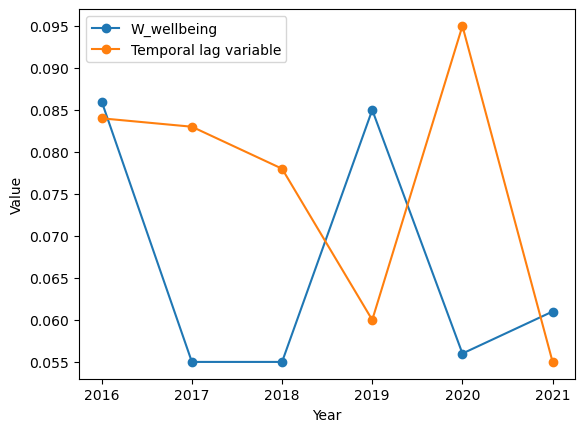

In [103]:
data = {
    'year': ['2016', '2017', '2018','2019','2020','2021'],
    'W_wellbeing': [0.086,0.055,	0.055,	0.085	,0.056,	0.061],
    'Temporal lag variable':[0.084,	0.083,	0.078,	0.060,	0.095	,0.055]
}

df = pd.DataFrame(data)
plt.figure(figsize=(16, 10))  # 可选: 调整图表大小
df.plot(kind='line', x='year', y=['W_wellbeing', 'Temporal lag variable'], marker='o')

# 添加标题和标签
plt.xlabel('Year')
plt.ylabel('Value')
plt.savefig('regression_line.png',bbox_inches='tight')